# Import Library dan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SVMSMOTE, SMOTE, ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
import warnings

In [ ]:
warnings.filterwarnings('ignore')
try :
  dataset = pd.read_csv('marketing_data.csv')
except :
  uploaded = files.upload()
  dataset = pd.read_csv('marketing_data.csv')

Saving marketing_data.csv to marketing_data.csv


# Exploratory Data Analysis (EDA)

## Deskripsi Dataset

`Tanggal Lahir` : Tanggal lahir customer

`Pergawean` : Jabatan pekerjaan customer saat ini

`Status kawin` : Status kawin customer saat ini

`Penghasilan per Tahun` : Penghasilan per tahun customer (dalam IDR)

`Tanggungan Ortu` : Jumlah orang tua yang masih menjadi tanggungan customer

`Tanggungan Anak` :  Jumlah anak yang ditanggung customer

`Mulai Berlangganan` : H-sekian customer mulai berlangganan (dihitung dari 8 September 2021)

`Transaksi Terakhir` : Jumlah hari setelah customer melakukan transaksi terakhir

`Sembako` : Jumlah uang yang dipakai untuk membeli sembako dalam 1 tahun terakhir

`Elektronik` : Jumlah uang yang dipakai untuk membeli elektronik dalam 1 tahun terakhir

`Hobi` : Jumlah uang yang dipakai untuk membeli barang hobi dalam 1 tahun terakhir

`Pakaian` : Jumlah uang yang dipakai untuk membeli pakaian dalam 1 tahun terakhir

`Buku` : Jumlah uang yang dipakai untuk membeli buku dalam 1 tahun terakhir

`Kesehatan` : Jumlah uang yang dipakai untuk membeli barang kesehatan dalam 1 tahun terakhir

`Jml Transaksi Diskon` : Jumlah transaksi dengan diskon yang telah customer lakukan

`Jml Transaksi App` : Jumlah transaksi melalui app yang telah customer lakukan

`Jml Transaksi Web` : Jumlah transaksi melalui web yang telah customer lakukan

`Jml Transaksi Outlet` : Jumlah transaksi melalui outlet yang telah customer lakukan

`Jml Kunjungan App` : Jumlah kunjungan customer ke app

`Komplain` : 1 jika customer pernah melakukan komplain, 0 jika tidak

`Pulau` : Pulau domisili customer

`Urutan Terima Penawaran` : Dari 6 tawaran, tawaran mana saja yang sudah diterima oleh customer. Jika customer menerima lebih dari 1 tawaran maka akan disimpan dalam list.



In [ ]:
dataset.shape

(2240, 22)

> Terdapat 2240 baris data dan 22 fitur

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tanggal Lahir            2240 non-null   object
 1   Pergawean                2240 non-null   object
 2   Status Kawin             2240 non-null   object
 3   Penghasilan per Tahun    2216 non-null   object
 4   Tanggungan Ortu          2240 non-null   int64 
 5   Tanggungan Anak          2240 non-null   int64 
 6   Mulai Berlangganan       2240 non-null   int64 
 7   Transaksi Terakhir       2240 non-null   int64 
 8   Sembako                  2240 non-null   int64 
 9   Elektronik               2240 non-null   int64 
 10  Hobi                     2240 non-null   int64 
 11  Pakaian                  2240 non-null   int64 
 12  Buku                     2240 non-null   int64 
 13  Kesehatan                2240 non-null   int64 
 14  Jml Transaksi Diskon     2240 non-null  

- Terdapat beberapa fitur yang belum memiliki tipe data yang seharusnya, sehingga tipe datanya perlu diubah :
  1. Tanggal Lahir (Object -> DateTime)
  2. Penghasilan per Tahun (Object -> Integer)
- Ada fitur yang memiliki nama yang tidak general/umum sehingga perlu diubah nama fiturnya yaitu :
  1. Pergawean(Bahasa Jawa) -> Pekerjaan (Bahasa Indonesia) 
-  Ada missing value di fitur dan perlu dihandle :
  1. Penghasilan per Tahun
  2. Urutan Terima Penawaran

In [ ]:
dataset.head(5)

,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran
0,7/23/1970,Karyawan,Cerai,"Rp84.835.000,-",0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,Tidak pernah,Jawa,5
1,8/18/1961,Karyawan,Lajang,"Rp57.091.000,-",0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,Tidak pernah,Sumatera,"[1, 5]"
2,4/9/1958,Karyawan,Menikah,"Rp67.267.000,-",0,1,-2708,0,134558,11877,59560,15215,2861,30702,1,3,2,5,2,Tidak pernah,NTT,NaN
3,12/18/1967,Karyawan,Berumahtangga,"Rp32.474.000,-",1,1,-2710,0,10558,877,1560,215,861,702,1,1,0,2,7,Tidak pernah,Kalimantan,NaN
4,4/30/1989,Karyawan,Lajang,"Rp21.474.000,-",1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,Tidak pernah,Jawa,"[2, 5]"


In [ ]:
dataset.tail(5)

,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran
2235,5/29/1976,Kepala Divisi,Cerai,"Rp66.476.000,-",0,1,-3140,99,372558,18877,126560,47215,48861,78702,2,5,2,11,4,Tidak pernah,NTT,NaN
2236,10/5/1977,C-level,Menikah,"Rp31.056.000,-",1,0,-3184,99,5558,10877,13560,3215,8861,16702,1,1,0,3,8,Tidak pernah,Jawa,NaN
2237,5/30/1976,Karyawan,Cerai,"Rp46.310.000,-",1,0,-3234,99,185558,2877,88560,15215,5861,14702,2,6,1,5,8,Tidak pernah,Jawa,NaN
2238,6/26/1978,Karyawan,Menikah,"Rp65.819.000,-",0,0,-3238,99,267558,38877,701560,149215,165861,63702,1,5,4,10,3,Tidak pernah,Sulawesi,NaN
2239,9/27/1969,Kepala Divisi,Menikah,"Rp94.871.000,-",0,2,-3327,99,169558,24877,553560,188215,861,144702,1,8,5,4,7,Tidak pernah,Sumatera,"[3, 4, 5]"


- fitur 'Urutan Terima Penawaran' terdapat dalam bentuk Array dan sepertinya perlu di-encode agar bisa dianalisis ataupun digunakan dalam pembuatan model. Karena setiap Array berisi urutan suatu penawaran diterima, berarti nilai NaN nya bisa diartikan Customer belum menerima tawaran hingga tawaran terakhir, sehingga nilai missing valuenya perlu di-replace dengan sebuah nilai tertentu yang menandakan suatu tawaran belum diterima

In [ ]:
dataset.describe()

,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App
count,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,-3014.582143,49.109375,3.044937e+05,27179.232143,1.675100e+05,37740.446429,27923.946429,44723.875000,2.325000,4.084821,2.662054,5.790179,5.316518
std,0.538398,0.544538,202.122512,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,-3360.000000,0.000000,5.580000e+02,877.000000,5.600000e+02,215.000000,861.000000,702.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-3190.000000,24.000000,2.430800e+04,1877.000000,1.656000e+04,3215.000000,1861.000000,9702.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,0.000000,0.000000,-3016.500000,49.000000,1.740580e+05,8877.000000,6.756000e+04,12215.000000,8861.000000,24702.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1.000000,1.000000,-2841.750000,74.000000,5.048080e+05,33877.000000,2.325600e+05,50215.000000,33861.000000,56702.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,2.000000,2.000000,-2661.000000,99.000000,1.493558e+06,199877.000000,1.725560e+06,259215.000000,263861.000000,362702.000000,15.000000,27.000000,28.000000,13.000000,20.000000


- Tanggungan Ortu : memiliki nilai max yaitu 2 dan nilai min yaitu 0
- Tanggungan Anak : memiliki nilai max yaitu 2 dan nilai min yaitu 0
- Mulai Berlangganan : memiliki nilai max yaitu -2661 dan nilai min yaitu -3360. Dari sini berarti dataset ini hanya berisi data customer lama (yang telah berlangganan setidaknya lebih dari 7 tahun)
- Transaksi terakhir : memiliki nilai max 99 dan nilai min 0
- Jml Transaksi Diskon : memiliki nilai max 15 dan nilai min 0
- Jml Transaksi App : memiliki nilai max 27 dan nilai min 0
- Jml Transaksi Web : memiliki nilai max 28 dan nilai min 0
- Jml Transaksi Outlet memiliki nilai max 13 dan nilai min 0
- Jml Kunjungan App : Memiliki nilai max 20 dan nilai min 0

In [ ]:
display(dataset.describe(include=np.object))

,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Komplain,Pulau,Urutan Terima Penawaran
count,2240,2240,2240,2216,2240,2240,609
unique,2106,5,8,1974,2,8,34
top,12/17/1952,Karyawan,Menikah,"Rp7.500.000,-",Tidak pernah,Jawa,5
freq,3,1127,864,12,2219,1095,146


- Tanggal Lahir : terdapat 2106 nilai unik dan modus yaitu 10/6/1979 dengan frekuensi kemunculan 3, berarti **persebaran tanggal lahir customer cukup bervariasi**. 
- Pergawean : terdapat 5 nilai unik dan modus yaitu Karyawan dengan frekuensi kemunculann 1127, berarti **sekitar 50% customer adalah karyawan**.
- Status Kawin : tedapat 8 nilai unik dan modus yaitu Menikah dengan frekuensi kemunculan 864, berarti **sekitar 38% customer berstatus Menikah**.
- Pulau : terdapat 8 nilai unik dan modus yaitu Jawa dengan frekuensi kemunculan 1095, berarti sekitar **48% customer berasal dari pulau Jawa**.
- Komplain : terdapat 2 nilai unik dan modus yaitu Tidak pernah dengan frekuensi kemunculan 2219, berarti sekitar **99% customer tidak pernah melakukan komplain**.
- Urutan terima penawaran : terdapat 34 nilai unik dan modus yaitu 5 dengan frekuensi kemunculan 146, berarti sekitar **24% dari customer yg menerima tawaran, hanya menerima tawaran di tawaran ke 5**.



## Data Visualization

##### Menampilkan countplot untuk data kategorikal

In [ ]:
def countplot(column, df):
    return sns.countplot(x=column, data=df)

In [ ]:
column_category = ['Pergawean','Status Kawin','Komplain','Pulau']

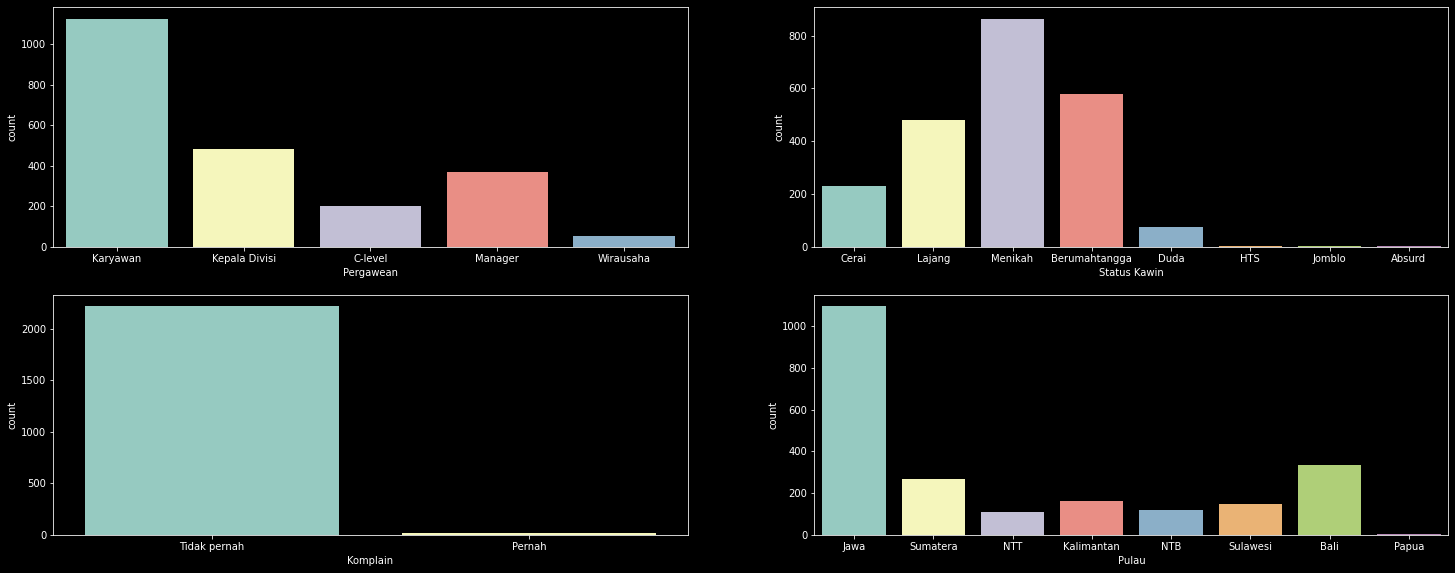

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(25,15))
  size_category = len(column_category)
  row = (size_category//2)+1
  counter = 1
  for elem in column_category:
      plt.subplot(row,2,counter)
      countplot(elem,dataset)
      counter = counter+1
  plt.show()

Hal yang bisa kita simpulkan dari grafik tersebut :
1. Pergawean : Terdapat 5 nilai unik dari fitur ini, namun sebenarnya **Kepala Divisi, C-Level, Manager overlap dengan Karyawan**
2. Status Kawin : Terdapat 8 nilai unik dari fitur ini, namun ada **beberapa atribut yang overlap** seperti Cerai/Duda, Menikah/Berumah Tangga, Lajang/Jomblo, serta beberapa nilai unik yang **tidak diketahui status kawinnya** (HTS, Absurd)
3. Komplain : Terlihat bahwa **perbandingan jumlah Customer yang pernah komplain dan tidak pernah Komplain sangat jauh**
4. Pulau : Terlihat bahwa Customer tersebar ke 8 pulau, dengan Customer **terbanyak terdapat di pulau Jawa**, dan **tersedikit terdapat di pulau Papua**.



##### Menampilkan boxplot untuk data numerik

In [ ]:
column_numeric = dataset.iloc[:, (np.where((dataset.dtypes == np.int64) | (dataset.dtypes == np.float64)))[0]].columns

In [ ]:
subfig_list = []
trace_count = 0
for column in column_numeric :
    fig = px.box(dataset, y= column)
    trace = fig['data'][0]
    subfig_list.append(trace)
    
fig = make_subplots(rows=5, cols=3, shared_xaxes=False, subplot_titles=(column_numeric))
for trace in subfig_list :
    row = (trace_count//3)+1
    col = (trace_count % 3)+1
    fig.add_trace(trace, row=row, col=col, )
    trace_count = trace_count+1
    
fig.update_layout(height=2000, width=1200, title_text="Boxplot for Numeric Data")
fig.show()


Terlihat bahwa terdapat outlier pada fitur :
- Sembako
- Elektronik
- Hobi
- Pakaian
- Buku
- Kesehatan
- Jml Transaksi Diskon
- Jml Transaksi App
- Jml Transaksi Web
- Jml Kunjungan App

##### Menampilkan heatmap untuk data numerik

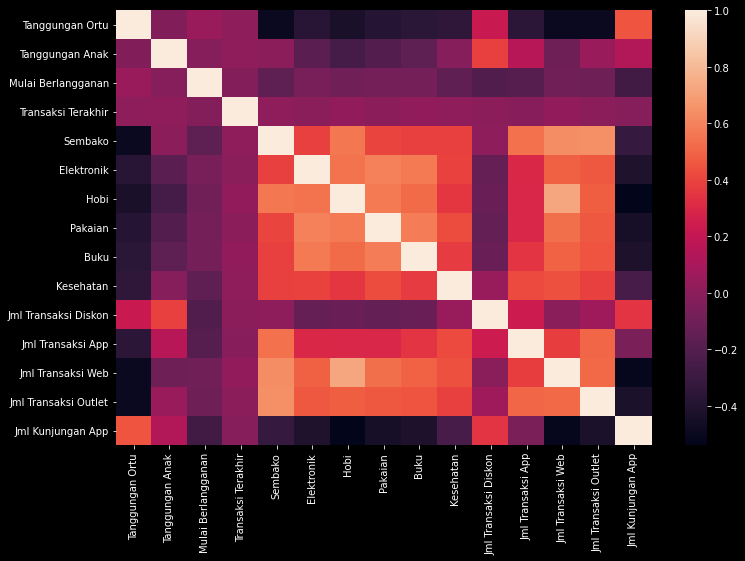

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8))
  sns.heatmap(dataset.corr())
  plt.show()

##### Menampilkan scatterplot untuk data numerik yang dependent

In [ ]:
corr_dataset = dataset.corr()
column_corr_dataset = corr_dataset.columns
column_dependent =[]
for col in corr_dataset :
    counter = 0
    for corr in corr_dataset[col]:
        if(corr>= 0.5 and corr<1):
            dependent_attribute = {col,column_corr_dataset[counter]}
            set_size = 0
            for sets in column_dependent :
                set_size = max(set_size,len(sets.intersection(dependent_attribute)))
            if(set_size != 2):
                column_dependent.append(dependent_attribute)
        counter = counter+1

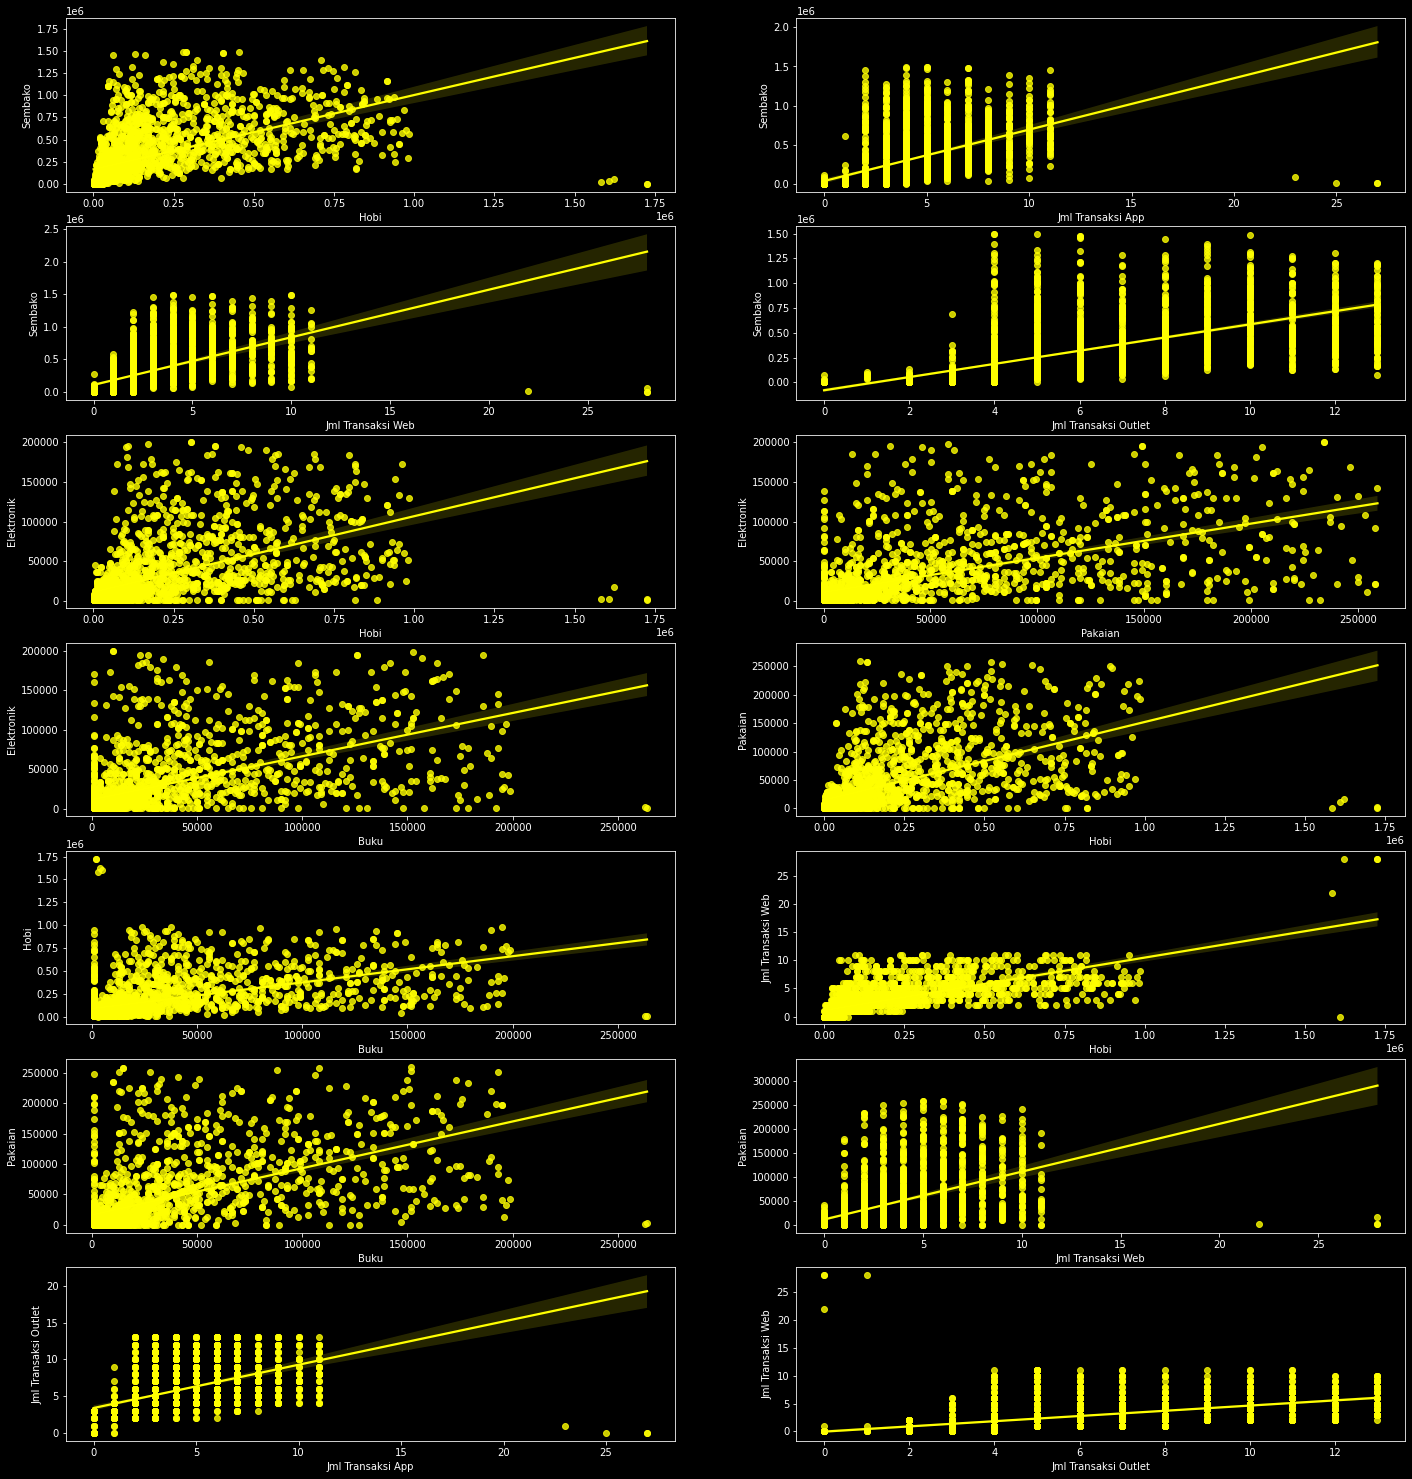

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(24, 30))
  size_category = len(column_dependent)
  row = (size_category//2)+1
  counter_x = 1
  for elem in column_dependent :
      counter = 0
      for column in elem :
          if(counter == 0):
              x = column
              counter = counter +1
          else:
              y = column
      plt.subplot(row,2,counter_x)
      sns.regplot(x=x, y= y, data=dataset, color='yellow')
      counter_x = counter_x+1
  plt.show()

# Data Preprocessing

## Cleaning

**Atribut "Penghasilan per Tahun"**

In [ ]:
dataset["Penghasilan per Tahun"] = dataset["Penghasilan per Tahun"].str.replace("Rp","").str.replace(",-","").str.replace(".","")

In [ ]:
dataset["Penghasilan per Tahun"]

0       84835000 
1       57091000 
2       67267000 
3       32474000 
4       21474000 
          ...    
2235    66476000 
2236    31056000 
2237    46310000 
2238    65819000 
2239    94871000 
Name: Penghasilan per Tahun, Length: 2240, dtype: object

In [ ]:
# Mengkonversi data bertipe object ke numeric
dataset['Penghasilan per Tahun'] = pd.to_numeric(dataset['Penghasilan per Tahun'], errors='coerce')

In [ ]:
dataset["Penghasilan per Tahun"]

0       84835000.0
1       57091000.0
2       67267000.0
3       32474000.0
4       21474000.0
           ...    
2235    66476000.0
2236    31056000.0
2237    46310000.0
2238    65819000.0
2239    94871000.0
Name: Penghasilan per Tahun, Length: 2240, dtype: float64

## Encoding

**Atribut "Tanggal Lahir"**

In [ ]:
dataset['Tanggal Lahir'] = pd.to_datetime(dataset['Tanggal Lahir'], errors='coerce')


In [ ]:
umur = 2021 - dataset['Tanggal Lahir'].dt.year
umur

0       51.0
1       60.0
2       63.0
3       54.0
4       32.0
        ... 
2235    45.0
2236    44.0
2237    45.0
2238    43.0
2239    52.0
Name: Tanggal Lahir, Length: 2240, dtype: float64

In [ ]:
dataset['Umur'] = umur
dataset.head(10)


,Tanggal Lahir,Pergawean,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur
0,1970-07-23,Karyawan,Cerai,84835000.0,0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,Tidak pernah,Jawa,5,51.0
1,1961-08-18,Karyawan,Lajang,57091000.0,0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,Tidak pernah,Sumatera,"[1, 5]",60.0
2,1958-04-09,Karyawan,Menikah,67267000.0,0,1,-2708,0,134558,11877,59560,15215,2861,30702,1,3,2,5,2,Tidak pernah,NTT,NaN,63.0
3,1967-12-18,Karyawan,Berumahtangga,32474000.0,1,1,-2710,0,10558,877,1560,215,861,702,1,1,0,2,7,Tidak pernah,Kalimantan,NaN,54.0
4,1989-04-30,Karyawan,Lajang,21474000.0,1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,Tidak pernah,Jawa,"[2, 5]",32.0
5,1958-10-02,Kepala Divisi,Lajang,71691000.0,0,0,-2765,0,336558,130877,411560,240215,32861,43702,1,4,7,5,2,Tidak pernah,Jawa,5,63.0
6,1954-11-19,C-level,Menikah,63564000.0,0,0,-2812,0,769558,80877,252560,15215,34861,65702,1,10,10,7,6,Tidak pernah,NTB,"[2, 5]",67.0
7,1967-10-01,Karyawan,Berumahtangga,44931000.0,0,1,-2823,0,78558,877,11560,215,861,7702,1,2,1,3,5,Tidak pernah,Jawa,NaN,54.0
8,1954-10-04,Kepala Divisi,Menikah,65324000.0,0,1,-2830,0,384558,877,102560,21215,32861,5702,3,6,2,9,4,Tidak pernah,NTT,NaN,67.0
9,1954-04-08,Kepala Divisi,Menikah,65324000.0,0,1,-2830,0,384558,877,102560,21215,32861,5702,3,6,2,9,4,Tidak pernah,Sulawesi,NaN,67.0


In [ ]:
dataset['Umur'].unique()


array([ 51.,  60.,  63.,  54.,  32.,  67.,  74.,  42.,  62.,  40.,  52.,
        44.,  61.,  55.,  45.,  56.,  65.,  46.,  50.,  35.,  nan,  47.,
        31.,  34.,  37.,  53.,  49.,  66.,  38.,  43.,  69.,  48.,  59.,
        57.,  39.,  64.,  41.,  76.,  72.,  73.,  75.,  36.,  29.,  58.,
        68.,  77.,  70.,  33.,  71.,  27.,  28.,  30., 128.,  25.,  26.,
       122.,  78.,  80.,  81., 121.])

In [ ]:
dataset.dropna(subset=['Umur'], inplace=True)

In [ ]:
dataset['Umur'].unique()

array([ 51.,  60.,  63.,  54.,  32.,  67.,  74.,  42.,  62.,  40.,  52.,
        44.,  61.,  55.,  45.,  56.,  65.,  46.,  50.,  35.,  47.,  31.,
        34.,  37.,  53.,  49.,  66.,  38.,  43.,  69.,  48.,  59.,  57.,
        39.,  64.,  41.,  76.,  72.,  73.,  75.,  36.,  29.,  58.,  68.,
        77.,  70.,  33.,  71.,  27.,  28.,  30., 128.,  25.,  26., 122.,
        78.,  80.,  81., 121.])

**Atribut "Pergawean"**

In [ ]:
dataset = dataset.rename(columns={'Pergawean': 'Pekerjaan'})

In [ ]:
encoding_dict = {"Pekerjaan":{"Kepala Divisi": "Karyawan", "Manager": "Karyawan","C-level":"Karyawan"}}
dataset = dataset.replace(encoding_dict)
dataset['Pekerjaan'].unique()

array(['Karyawan', 'Wirausaha'], dtype=object)

In [ ]:
dataset.head(5)

,Tanggal Lahir,Pekerjaan,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur
0,1970-07-23,Karyawan,Cerai,84835000.0,0,0,-2674,0,189558,104877,379560,111215,189861,218702,1,4,4,6,1,Tidak pernah,Jawa,5,51.0
1,1961-08-18,Karyawan,Lajang,57091000.0,0,0,-2675,0,464558,5877,64560,7215,861,37702,1,7,3,7,5,Tidak pernah,Sumatera,"[1, 5]",60.0
2,1958-04-09,Karyawan,Menikah,67267000.0,0,1,-2708,0,134558,11877,59560,15215,2861,30702,1,3,2,5,2,Tidak pernah,NTT,NaN,63.0
3,1967-12-18,Karyawan,Berumahtangga,32474000.0,1,1,-2710,0,10558,877,1560,215,861,702,1,1,0,2,7,Tidak pernah,Kalimantan,NaN,54.0
4,1989-04-30,Karyawan,Lajang,21474000.0,1,0,-2743,0,6558,16877,24560,11215,861,34702,2,3,1,2,7,Tidak pernah,Jawa,"[2, 5]",32.0


**Atribut "Status Kawin"**

Atribut ini memiliki 8 nilai unik, namun terdapat value yang dapat dijadikan kategori yang sama, seperti Cerai/Duda, Menikah/Berumah Tangga, Lajang/Jomblo, serta HTS/Absurd. Untuk dapat memproses data ini, dilakukan encoding berdasarkan kategori-kategori tersebut.


In [ ]:
dataset["Status Kawin"].unique()

array(['Cerai', 'Lajang', 'Menikah', 'Berumahtangga', 'Duda', 'HTS',
       'Jomblo', 'Absurd'], dtype=object)

In [ ]:
encoding_dict = {"Status Kawin":{"Cerai": 1, "Duda": 1, "Menikah": 2, "Berumahtangga": 2, "Lajang": 3, "Jomblo": 3, "HTS": 4, "Absurd": 4}}

dataset = dataset.replace(encoding_dict)

In [ ]:
dataset["Status Kawin"]

0       1
1       3
2       2
3       2
4       3
       ..
2235    1
2236    2
2237    1
2238    2
2239    2
Name: Status Kawin, Length: 2198, dtype: int64

**Atribut "Komplain"**

Atribut ini memiliki 2 nilai unik, yaitu 'Pernah' dan 'Tidak pernah'. Dilakukan encoding dengan mengganti value 'Pernah' menjadi 1 dan 'Tidak pernah' menjadi 0.

In [ ]:
dataset["Komplain"].unique()

array(['Tidak pernah', 'Pernah'], dtype=object)

In [ ]:
encoding_dict = {"Komplain":{"Tidak pernah": 0, "Pernah": 1}}

dataset = dataset.replace(encoding_dict)

In [ ]:
dataset["Komplain"]

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Komplain, Length: 2198, dtype: int64

## Duplikasi Data

In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2198, dtype: bool

In [ ]:
# Mengecek baris data yang duplikat terhadap semua kolom
df_duplicateRows = dataset[dataset.duplicated()]
print(df_duplicateRows)

Empty DataFrame
Columns: [Tanggal Lahir, Pekerjaan, Status Kawin, Penghasilan per Tahun, Tanggungan Ortu, Tanggungan Anak, Mulai Berlangganan, Transaksi Terakhir, Sembako, Elektronik, Hobi, Pakaian, Buku, Kesehatan, Jml Transaksi Diskon, Jml Transaksi App, Jml Transaksi Web, Jml Transaksi Outlet, Jml Kunjungan App, Komplain, Pulau, Urutan Terima Penawaran, Umur]
Index: []


Hasil pengecekan tersebut menunjukkan bahwa tidak terdapat duplikat pada data.

## Missing Value

**Mendeteksi Missing Value**

In [ ]:
# mendeteksi missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(dataset)

                         Total   Percent
Urutan Terima Penawaran   1599  0.727480
Penghasilan per Tahun       24  0.010919


**Menangani Missing Value**

In [ ]:
# Untuk atribut "Penghasilan per Tahun", null value akan diisi dengan nilai median
col = ["Penghasilan per Tahun"]
for c in col:
    median = dataset[~dataset.isna()].median()[0]
    dataset[c] = dataset[c].fillna(median)

In [ ]:
# Untuk atribut "Urutan Terima Penawaran", null value akan diisi dengan -1
col = ["Urutan Terima Penawaran"]
for c in col:
    median = dataset[~dataset.isna()].median()[0]
    dataset[c] = dataset[c].fillna("-1")

In [ ]:
cek_null(dataset)

Empty DataFrame
Columns: [Total, Percent]
Index: []


## Outlier

**Mendeteksi outlier**

In [ ]:
def detect_outliers(data,lower_limit,upper_limit):
    outliers = []
    for i in data:
        if i < lower_limit or i > upper_limit:
            outliers.append(i)
    return outliers

def count_outlier(feature):
    arr =[]
    sorted_data = dataset.sort_values(by=[feature])
    # Menghitung quartil 1 dan 3.
    Q1 = sorted_data[feature].quantile(0.25)
    Q3 = sorted_data[feature].quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    # Menampilkan banyaknya outlier pada atribut fare.
    feature_outliers = detect_outliers(sorted_data[feature],lower_limit,upper_limit)
    percent =len(feature_outliers)/len(sorted_data[feature])
    ranges = dataset[feature].max() - dataset[feature].min()
    arr.append(len(feature_outliers))
    arr.append(percent)
    arr.append(ranges)
    return arr
    
def print_outlier(data):
    arr=[]
    dict1={}
    dict2={}
    dict3={}
    for i in data.columns:
        dict1[i]= count_outlier(i)[0]
        dict2[i] = count_outlier(i)[1]
        dict3[i] = count_outlier(i)[2]
    arr.append(dict1)
    arr.append(dict2)
    arr.append(dict3)
    return arr

In [ ]:
### drop non-numeric column
df_outlier = dataset.copy()
del df_outlier["Tanggal Lahir"]
del df_outlier["Pekerjaan"]
del df_outlier["Status Kawin"]
del df_outlier["Penghasilan per Tahun"]
del df_outlier["Komplain"]
del df_outlier["Pulau"]
del df_outlier["Urutan Terima Penawaran"]

### detect outlier for df
outliers = print_outlier(df_outlier)
col_outlier= pd.Series(outliers[0])
col_percentage = pd.Series(outliers[1])
col_range = pd.Series(outliers[2])

### display the outlier with percentage
df_outlier= pd.concat([col_outlier, col_percentage,col_range], axis=1, keys=['Total', 'Percent','Range'])
display(df_outlier)

,Total,Percent,Range
Tanggungan Ortu,0,0.000000,2.0
Tanggungan Anak,0,0.000000,2.0
Mulai Berlangganan,0,0.000000,699.0
Transaksi Terakhir,0,0.000000,99.0
Sembako,34,0.015469,1493000.0
Elektronik,240,0.109190,199000.0
Hobi,169,0.076888,1725000.0
Pakaian,220,0.100091,259000.0
Buku,234,0.106460,263000.0
Kesehatan,203,0.092357,362000.0


In [ ]:
df_outlier = df_outlier[df_outlier['Total']>0]
df_outlier 

,Total,Percent,Range
Sembako,34,0.015469,1493000.0
Elektronik,240,0.109190,199000.0
Hobi,169,0.076888,1725000.0
Pakaian,220,0.100091,259000.0
Buku,234,0.106460,263000.0
Kesehatan,203,0.092357,362000.0
Jml Transaksi Diskon,85,0.038672,15.0
Jml Transaksi App,4,0.001820,27.0
Jml Transaksi Web,23,0.010464,28.0
Jml Kunjungan App,8,0.003640,20.0


**Menangani Outlier**

In [ ]:
def remove_outlier(df_in, col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3 - q1
  rlb = q1 - 1.5 * iqr
  rub = q3 + 1.5 * iqr
  for i in df_in[col_name] :
    if i > rub or i < rlb :
      df_in = df_in[df_in[col_name] != i]
  return df_in

In [ ]:
def replace_outlier(df_in, col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3 - q1
  rlb = q1 - 1.5 * iqr
  rub = q3 + 1.5 * iqr
  median = df_in[col_name].median()
  for i in df_in[col_name] :
    if i > rub or i < rlb :
      df_in = df_in.replace({col_name:{i: median}})
      #df_in = df_in[df_in[col_name] != i]
  return df_in

In [ ]:
dataset.shape

(2198, 23)

In [ ]:
df_outlier.index

Index(['Sembako', 'Elektronik', 'Hobi', 'Pakaian', 'Buku', 'Kesehatan',
       'Jml Transaksi Diskon', 'Jml Transaksi App', 'Jml Transaksi Web',
       'Jml Kunjungan App', 'Umur'],
      dtype='object')

In [ ]:
for col in df_outlier.index:
  if col != 'Jml Transaksi Diskon':
    dataset = replace_outlier(dataset,col)
dataset.shape

(2198, 23)

**Encode Atribut Urutan Terima Penawaran** (diakhir karena harus setelah handle missing value)

dipisah menjadi terima penawaran 0 - 5 dan ditambahkan atribut baru 'Mulai Terima Pada Penawaran ke', 'Jml Tawaran Diterima'

In [ ]:
dataset.reset_index(inplace = True, drop = True)
dataset.head(5)

,Tanggal Lahir,Pekerjaan,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur
0,1970-07-23,Karyawan,1,84835000.0,0,0,-2674,0,189558.0,8877.0,379560.0,111215.0,8861.0,24702.0,1,4.0,4.0,6,1.0,0,Jawa,5,51.0
1,1961-08-18,Karyawan,3,57091000.0,0,0,-2675,0,464558.0,5877.0,64560.0,7215.0,861.0,37702.0,1,7.0,3.0,7,5.0,0,Sumatera,"[1, 5]",60.0
2,1958-04-09,Karyawan,2,67267000.0,0,1,-2708,0,134558.0,11877.0,59560.0,15215.0,2861.0,30702.0,1,3.0,2.0,5,2.0,0,NTT,-1,63.0
3,1967-12-18,Karyawan,2,32474000.0,1,1,-2710,0,10558.0,877.0,1560.0,215.0,861.0,702.0,1,1.0,0.0,2,7.0,0,Kalimantan,-1,54.0
4,1989-04-30,Karyawan,3,21474000.0,1,0,-2743,0,6558.0,16877.0,24560.0,11215.0,861.0,34702.0,2,3.0,1.0,2,7.0,0,Jawa,"[2, 5]",32.0


In [ ]:
dataset['Mulai Terima pada Penawaran ke'] = np.inf
dataset['Terima Penawaran 0'] = 0
dataset['Terima Penawaran 1'] = 0
dataset['Terima Penawaran 2'] = 0
dataset['Terima Penawaran 3'] = 0
dataset['Terima Penawaran 4'] = 0
dataset['Terima Penawaran 5'] = 0
dataset['Jml Tawaran Diterima'] = 0

In [ ]:
for i in range(dataset.shape[0]):
    if dataset['Urutan Terima Penawaran'][i] == "-1":
        pass
    else :  
        index = 0
        index_str = dataset['Urutan Terima Penawaran'][i][index]
        length = len(dataset['Urutan Terima Penawaran'][i])
        counter = 0
        while(index < length):
            if index_str == "0":
                dataset['Terima Penawaran 0'][i]=1
                if(counter==0):
                    dataset['Mulai Terima pada Penawaran ke'][i]=int(index_str)
                counter = counter +1
            elif index_str == "1":
                dataset['Terima Penawaran 1'][i]=1
                if(counter==0):
                    dataset['Mulai Terima pada Penawaran ke'][i]=int(index_str)
                counter = counter +1
            elif index_str == "2":
                dataset['Terima Penawaran 2'][i]=1
                if(counter==0):
                    dataset['Mulai Terima pada Penawaran ke'][i]=int(index_str)
                counter = counter +1
            elif index_str == "3":
                dataset['Terima Penawaran 3'][i]=1
                if(counter==0):
                    dataset['Mulai Terima pada Penawaran ke'][i]=int(index_str)
                counter = counter +1
            elif index_str == "4":
                dataset['Terima Penawaran 4'][i]=1
                if(counter==0):
                    dataset['Mulai Terima pada Penawaran ke'][i]=int(index_str)
                counter = counter +1
            elif index_str == "5":
                dataset['Terima Penawaran 5'][i]=1
                if(counter==0):
                    dataset['Mulai Terima pada Penawaran ke'][i]=int(index_str)
                counter = counter +1
            if index+1 == length :
                break
            index = index +1
            index_str = dataset['Urutan Terima Penawaran'][i][index]
        dataset['Jml Tawaran Diterima'][i] = counter

In [ ]:
dataset.head()

,Tanggal Lahir,Pekerjaan,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur,Mulai Terima pada Penawaran ke,Terima Penawaran 0,Terima Penawaran 1,Terima Penawaran 2,Terima Penawaran 3,Terima Penawaran 4,Terima Penawaran 5,Jml Tawaran Diterima
0,1970-07-23,Karyawan,1,84835000.0,0,0,-2674,0,189558.0,8877.0,379560.0,111215.0,8861.0,24702.0,1,4.0,4.0,6,1.0,0,Jawa,5,51.0,5.0,0,0,0,0,0,1,1
1,1961-08-18,Karyawan,3,57091000.0,0,0,-2675,0,464558.0,5877.0,64560.0,7215.0,861.0,37702.0,1,7.0,3.0,7,5.0,0,Sumatera,"[1, 5]",60.0,1.0,0,1,0,0,0,1,2
2,1958-04-09,Karyawan,2,67267000.0,0,1,-2708,0,134558.0,11877.0,59560.0,15215.0,2861.0,30702.0,1,3.0,2.0,5,2.0,0,NTT,-1,63.0,inf,0,0,0,0,0,0,0
3,1967-12-18,Karyawan,2,32474000.0,1,1,-2710,0,10558.0,877.0,1560.0,215.0,861.0,702.0,1,1.0,0.0,2,7.0,0,Kalimantan,-1,54.0,inf,0,0,0,0,0,0,0
4,1989-04-30,Karyawan,3,21474000.0,1,0,-2743,0,6558.0,16877.0,24560.0,11215.0,861.0,34702.0,2,3.0,1.0,2,7.0,0,Jawa,"[2, 5]",32.0,2.0,0,0,1,0,0,1,2


# Data Modelling and Task Solving

## Customer Segmentation [Task 1]

> Buatlah cluster-cluster customer berdasarkan fitur yang cocok menurut Anda! Gunakan satu model clustering dan juga model RFM (simpan kalkulasi RFM sebagai fitur untuk soal selanjutnya). Apakah cluster yang dihasilkan dapat merepresentasikan customer berdasarkan suatu fakta?

### Customer Segmentation Non RFM Model

#### Feature Selection

> Pada clustering ini, kami memutuskan untuk membagi komoditas menjadi 3 fitur kebutuhan (Primer, Sekunder, Tersier) untuk menganalisis bagaimana segmentasi customer dari item yang diminatinya terhadap kebutuhannya. 

In [ ]:
primer = dataset['Sembako'] + dataset['Pakaian'] + dataset['Kesehatan']
primer = primer.rename("Primer")
primer = primer.to_frame()
primer.head(5)

,Primer
0,325475.0
1,509475.0
2,180475.0
3,11475.0
4,52475.0


In [ ]:
sekunder = dataset['Elektronik'] + dataset['Buku'] 
sekunder = sekunder.rename("Sekunder")
sekunder = sekunder.to_frame()
sekunder.head(5)

,Sekunder
0,17738.0
1,6738.0
2,14738.0
3,1738.0
4,17738.0


In [ ]:
tersier = dataset['Hobi']
tersier = tersier.rename("tersier")
tersier = tersier.to_frame()
tersier.head(5)

,tersier
0,379560.0
1,64560.0
2,59560.0
3,1560.0
4,24560.0


In [ ]:
kebutuhan = pd.DataFrame()
kebutuhan['Primer'] = primer['Primer']
kebutuhan['Sekunder']= sekunder
kebutuhan['Tersier']= tersier
kebutuhan

,Primer,Sekunder,Tersier
0,325475.0,17738.0,379560.0
1,509475.0,6738.0,64560.0
2,180475.0,14738.0,59560.0
3,11475.0,1738.0,1560.0
4,52475.0,17738.0,24560.0
...,...,...,...
2193,498475.0,67738.0,126560.0
2194,25475.0,19738.0,13560.0
2195,215475.0,8738.0,88560.0
2196,343475.0,47738.0,68060.0


#### Standarisasi Fitur

In [ ]:
scaler = StandardScaler()
kebutuhan_normalized = scaler.fit_transform(kebutuhan)
kebutuhan_normalized = pd.DataFrame(kebutuhan_normalized, columns=kebutuhan.columns)
kebutuhan_normalized.head(5)

,Primer,Sekunder,Tersier
0,-0.041171,-0.393585,1.933732
1,0.509470,-0.757157,-0.366204
2,-0.475100,-0.492741,-0.402711
3,-0.980852,-0.922416,-0.826191
4,-0.858155,-0.393585,-0.658259


#### T-SNE Dimensional Reduction

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=2021)
kebutuhan_tsne = tsne.fit_transform(kebutuhan_normalized)
kebutuhan_tsne = pd.DataFrame(data=kebutuhan_tsne, columns=['1st_principal','2nd_principal'])
kebutuhan_tsne.head(5)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2198 samples in 0.001s...
[t-SNE] Computed neighbors for 2198 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2198
[t-SNE] Computed conditional probabilities for sample 2000 / 2198
[t-SNE] Computed conditional probabilities for sample 2198 / 2198
[t-SNE] Mean sigma: 0.049186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.050934
[t-SNE] KL divergence after 1000 iterations: 0.709495


,1st_principal,2nd_principal
0,-8.953032,-29.922026
1,-21.523075,24.746710
2,12.023006,6.863138
3,61.266979,-34.966015
4,29.110310,28.884987


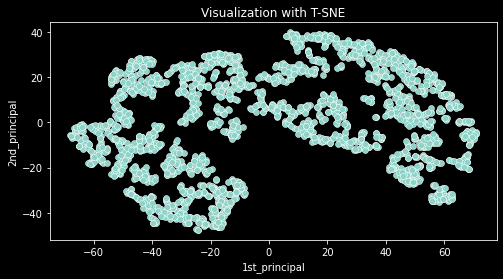

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  sns.scatterplot(data=kebutuhan_tsne, x='1st_principal', y='2nd_principal')
  plt.title("Visualization with T-SNE")
  plt.show()

> Dari analisis terhadap visualisasi T-SNE diatas, kita dapat membaginya menjadi 2 cluster dan menggunakan K-Means clustering dengan karena cluster cukup berbentuk hypersphere

#### Membuat Model Clustering

###### Menentukan nilai k dengan Silhoutte Score

In [ ]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(kebutuhan_tsne)
    centers = clusterer.cluster_centers_

    score = silhouette_score(kebutuhan_tsne, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5285951495170593)
For n_clusters = 3, silhouette score is 0.4321039915084839)
For n_clusters = 4, silhouette score is 0.42085641622543335)
For n_clusters = 5, silhouette score is 0.42500820755958557)
For n_clusters = 6, silhouette score is 0.42152535915374756)
For n_clusters = 7, silhouette score is 0.45436564087867737)
For n_clusters = 8, silhouette score is 0.45834410190582275)
For n_clusters = 9, silhouette score is 0.44195812940597534)


> Terlihat bahwa nilai Silhoutte Score yang bagus dimiliki oleh cluster 2, sehingga kita bisa memilih k = 2

In [ ]:
# agg = AgglomerativeClustering(n_clusters=2, linkage='average')
# y_clusters = agg.fit_predict(kebutuhan_tsne)

kmeans= KMeans(n_clusters=2, max_iter = 50, random_state=2021)
y_clusters = kmeans.fit_predict(kebutuhan_tsne)

cluster = len(np.unique(y_clusters))
y_clusters

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

##### Melihat visualisasi dari cluster yang dibuat

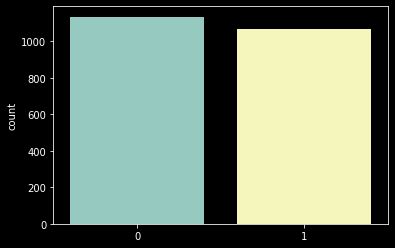

In [ ]:
with plt.style.context('dark_background'):
  sns.countplot(x = y_clusters)
  plt.show()

###### 2D T-SNE Visualization of Cluster

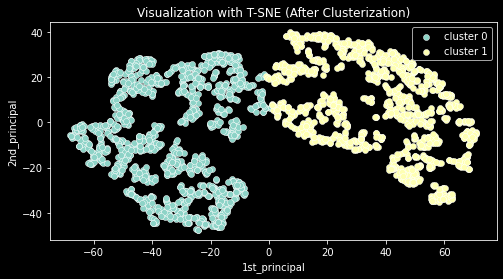

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8,4))
  for i in range(cluster+1):
      sns.scatterplot(data=kebutuhan_tsne[y_clusters==i], x='1st_principal', y='2nd_principal',label = "cluster "+str(i))
  plt.title("Visualization with T-SNE (After Clusterization)")
  plt.show()

> Terlihat kita berhasil melakukan Clustering dengan K-Means

###### 2D Visualization of Cluster

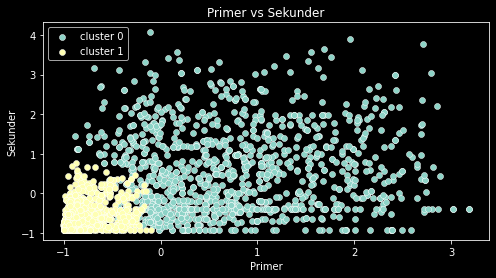

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(cluster):
      sns.scatterplot(data=kebutuhan_normalized[y_clusters==i], x='Primer', y='Sekunder',label = "cluster "+str(i))
  plt.title("Primer vs Sekunder")
  plt.show()

> - Bisa dilihat bahwa **Cluster 0** memiliki **High Primer** dan **High Sekunder**
- Sedangkan **Cluster 1** memiliki **Less Primer** dan **Less Sekunder**.
- Selain itu kita bisa melihat juga ada anggota cluster 0 yang menghabiskan banyak di kebutuhan primer tanpa menghabiskan di kebutuhan sekunder begitupun sebaliknya

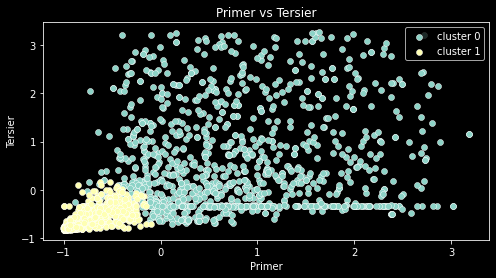

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(cluster):
      sns.scatterplot(data=kebutuhan_normalized[y_clusters==i], x='Primer', y='Tersier',label = "cluster "+str(i))
  plt.title("Primer vs Tersier")
  plt.show()

> - Bisa dilihat bahwa **Cluster 0** memiliki **High Primer** dan **High Tersier**
- Sedangkan **Cluster 1** memiliki **Less Primer** dan **Less Tersier**.
- Kemudian kita bisa melihat juga ada anggota cluster 0 yang menghabiskan banyak di kebutuhan primer tanpa menghabiskan di kebutuhan tersier begitupun sebaliknya
- Selain itu, dapat dilihat juga bahwa cluster 1 cenderung terlihat terlalu padat dan sempit, mengindikasikan customer pada cluster ini yg melakukan pembelian primer berbarengan dengan tersier tidak terlalu bervariasi. 

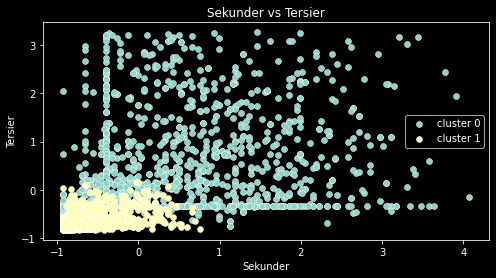

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(cluster):
      sns.scatterplot(data=kebutuhan_normalized[y_clusters==i], x='Sekunder', y='Tersier',label = "cluster "+str(i))
  plt.title("Sekunder vs Tersier")
  plt.show()

> - Bisa dilihat bahwa **Cluster 0** memiliki **High Sekunder** dan **High Tersier**
- Sedangkan **Cluster 1** memiliki **Less Sekunder** dan **Less Tersier**.
- Kemudian kita bisa melihat juga ada anggota cluster 0 yang menghabiskan banyak di kebutuhan sekunder tanpa menghabiskan di kebutuhan tersier begitupun sebaliknya

###### 3D Visualization of Cluster

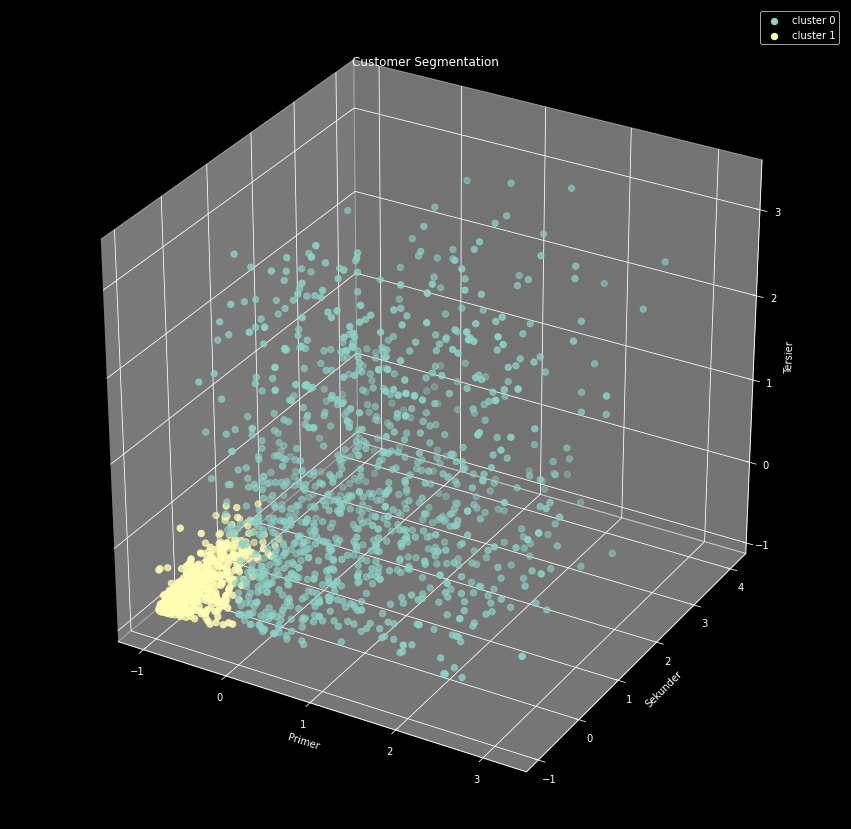

In [ ]:
with plt.style.context('dark_background'):
  fig = plt.figure(figsize = (15,15))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(kebutuhan_normalized[y_clusters == 0]['Primer'],kebutuhan_normalized[y_clusters == 0]['Sekunder'],kebutuhan_normalized[y_clusters == 0]['Tersier'], s = 40 , label = "cluster 0")
  ax.scatter(kebutuhan_normalized[y_clusters == 1]['Primer'],kebutuhan_normalized[y_clusters == 1]['Sekunder'],kebutuhan_normalized[y_clusters == 1]['Tersier'], s = 40 , label = "cluster 1")
  ax.set_xlabel('Primer')
  ax.set_ylabel('Sekunder')
  ax.set_zlabel('Tersier')
  ax.legend()
  plt.title("Customer Segmentation")
  plt.show()

>- Bisa dilihat bahwa **Cluster 0** memiliki **High Primer**, **High Sekunder** dan **High Tersier**
- Sedangkan untuk **Cluster 0** memiliki **Less Primer**, **Less Sekunder** dan **Less Tersier**

##### Customer Segmentation 

> Berdasarkan clustering yang dilakukan bisa didapat dua tipe customer :
- *Cluster 0 (Dependent Customer)* :**High Primer**, **High Sekunder** dan **High Tersier**. Customer tipe ini sudah cukup bergantung ke perusahaan kita dalam pembelian di beberapa aspek kebutuhan. Akan tetapi, jika kita lihat, tipe kebutuhan yang diminati pada customer ini masih ada yang belum saling berbarengan, seperti hanya primer saja, sekunder saja, ataupun tersier saja. Oleh karenanya, rekomendasi yang kami berikan adalah pemberian penawaran pada customer dengan tipe ini bergantung tipe kebutuhan yang belum diminatinya, misalnya jika ia sudah minat di primer, maka kita bisa memberikan offer di kebutuhan sekunder atau tersier, dengan meningkatkan ketergantugan customer dengan kita akan dapat meningkatkan penjualan perusahaan kita ini. 
- *Cluster 1 (Non-Dependent Customer)* : **Less Primer**, **Less Sekunder** dan **Less Tersier**. Customer tipe ini belum cukup bergantung dengan perusahaan kita dalam pembelian aspek kebutuhan. Cluster customer ini bisa diminimalkan dengan lebih meningkatkan branding perusahaan serta memberikan harga yang lebih menarik dibandingkan kompetitor, dengan ini akan menarik customer-customer ini untuk bergantung ke perusahaan kita dalam aspek kebutuhan. 

### Customer Segmentation with RFM Model

#### Membuat fitur-fitur untuk RFM Model

##### Recency

> It refers to the number of days before the reference date when a customer made the last purchase. Lesser the value of recency, higher is the customer visit to a store.

In [ ]:
recency = dataset['Transaksi Terakhir']
recency = recency.rename("Recency")
recency = recency.to_frame()
recency.head(5)

,Recency
0,0
1,0
2,0
3,0
4,0


##### Frequency 

> It is the period between two subsequent purchases of a customer. Higher the value of Frequency, more is the customer visit to the company.

In [ ]:
frequency = dataset['Jml Transaksi App']+dataset['Jml Transaksi Web']+dataset['Jml Transaksi Outlet']
frequency = frequency.rename('Frequency')
frequency = frequency.to_frame()
frequency.head(5)

,Frequency
0,14.0
1,17.0
2,10.0
3,3.0
4,6.0


##### Monetary

> This refers to the amount of money spent by a customer during a specific period of time. Higher the value, more is the profit generated to the company.

In [ ]:
monetary = dataset['Sembako']+dataset['Elektronik']+dataset['Hobi']+dataset['Pakaian']+dataset['Buku']+dataset['Kesehatan']
monetary = monetary.rename('Monetary')
monetary = monetary.to_frame()
monetary.head(5)

,Monetary
0,722773.0
1,580773.0
2,254773.0
3,14773.0
4,94773.0


In [ ]:
rfm = pd.DataFrame()
rfm['Recency'] = recency['Recency']
rfm['Frequency']= frequency
rfm['Monetary']= monetary
dataset['Recency'] = rfm['Recency']
dataset['Frequency'] = rfm['Frequency']
dataset['Monetary'] = rfm['Monetary']
rfm

,Recency,Frequency,Monetary
0,0,14.0,722773.0
1,0,17.0,580773.0
2,0,10.0,254773.0
3,0,3.0,14773.0
4,0,6.0,94773.0
...,...,...,...
2193,99,18.0,692773.0
2194,99,4.0,58773.0
2195,99,12.0,312773.0
2196,99,19.0,459273.0


#### Membuat Model Clustering dengan RFM Model

##### Standarisasi fitur

In [ ]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)
rfm_normalized = pd.DataFrame(rfm_normalized, columns=rfm.columns)
rfm_normalized.head(5)

,Recency,Frequency,Monetary
0,-1.697244,0.226265,0.538873
1,-1.697244,0.648566,0.218945
2,-1.697244,-0.336803,-0.515536
3,-1.697244,-1.322172,-1.056258
4,-1.697244,-0.899871,-0.876017


##### T-SNE Dimensional Reduction

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=2021)
rfm_tsne = tsne.fit_transform(rfm_normalized)
rfm_tsne = pd.DataFrame(data=rfm_tsne, columns=['1st_principal','2nd_principal'])
rfm_tsne.head(5)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2198 samples in 0.001s...
[t-SNE] Computed neighbors for 2198 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2198
[t-SNE] Computed conditional probabilities for sample 2000 / 2198
[t-SNE] Computed conditional probabilities for sample 2198 / 2198
[t-SNE] Mean sigma: 0.159188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.276329
[t-SNE] KL divergence after 1000 iterations: 0.592134


,1st_principal,2nd_principal
0,-13.567239,35.414906
1,-14.073967,32.718845
2,2.244866,37.255836
3,32.126656,50.351665
4,22.038239,46.785275


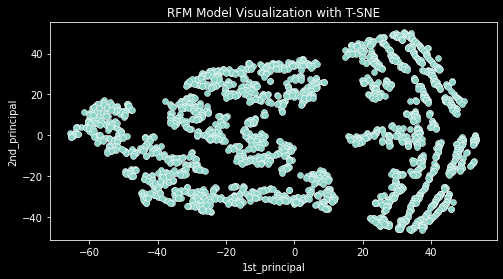

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  sns.scatterplot(data=rfm_tsne, x='1st_principal', y='2nd_principal')
  plt.title("RFM Model Visualization with T-SNE")
  plt.show()

> Dari analisis terhadap visualisasi T-SNE diatas, kita dapat membaginya menjadi 2 cluster dan menggunakan agglomerative clustering dengan single link (karena cluster tidak terlalu hyper sphere untuk menggunakan K-Means)

##### Membuat Model

In [ ]:
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
y_clusters = agg.fit_predict(rfm_tsne)
cluster = len(np.unique(y_clusters))
y_clusters

array([0, 0, 0, ..., 0, 0, 0])

##### Melihat visualisasi dari cluster yang dibuat

###### Countplot

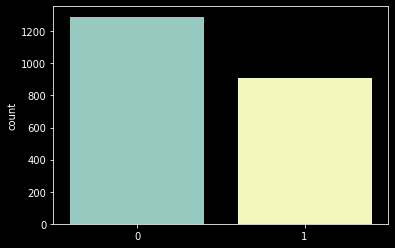

In [ ]:
with plt.style.context('dark_background'):
  sns.countplot(x = y_clusters)
  plt.show()

###### 2D TSNE Visualization of Cluster

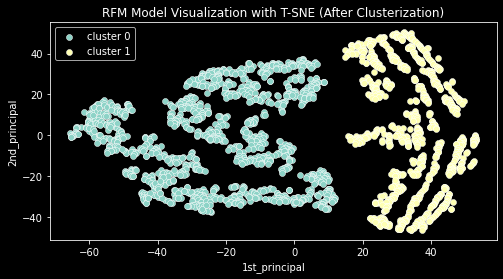

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(cluster+1):
      sns.scatterplot(data=rfm_tsne[y_clusters==i], x='1st_principal', y='2nd_principal',label = "cluster "+str(i))
  plt.title("RFM Model Visualization with T-SNE (After Clusterization)")
  plt.show()

> Terlihat bahwa kita berhasil membaginya menjadi 2 cluster

###### 2D Visualization of Cluster


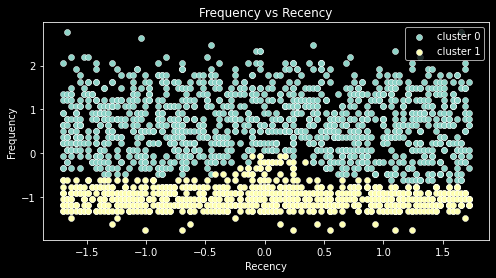

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(2):
      sns.scatterplot(data=rfm_normalized[y_clusters==i], x='Recency', y='Frequency',label = "cluster "+str(i))
  plt.title("Frequency vs Recency")
  plt.show()

> - Bisa dilihat bahwa **Cluster 0** yang memiliki **High Frequency** memiliki persebaran nilai **Recency yang merata**
- Begitupun untuk **Cluster 1** yang memiliki **Less Frequency** memiliki persebaran nilai **Recency yang merata** juga.

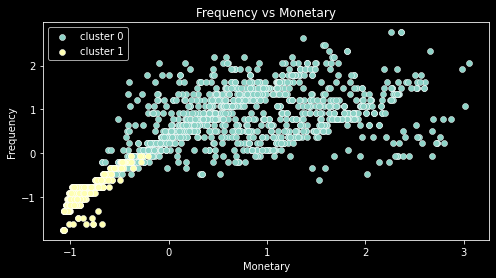

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(2):
      sns.scatterplot(data=rfm_normalized[y_clusters==i], x='Monetary', y='Frequency',label = "cluster "+str(i))
  plt.title("Frequency vs Monetary")
  plt.show()

> - Bisa dilihat bahwa **Cluster 0** memiliki **High Frequency** dan **High Monetary**
- Sedangkan untuk **Cluster 1** memiliki **Less Frequency** dan **Less Monetary**.

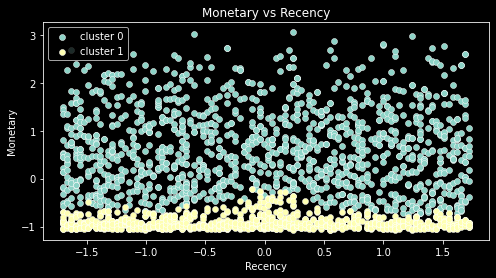

In [ ]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(8, 4))
  for i in range(2):
      sns.scatterplot(data=rfm_normalized[y_clusters==i], x='Recency', y='Monetary' ,label = "cluster "+str(i))
  plt.title("Monetary vs Recency")
  plt.show()

>- Bisa dilihat bahwa **Cluster 0** yang memiliki **High Monetary** memiliki persebaran nilai **Recency yang merata**
- Begitupun untuk **Cluster 1** yang memiliki **Less Monetary** memiliki persebaran nilai **Recency yang merata** juga.

###### 3D Visualization of Cluster

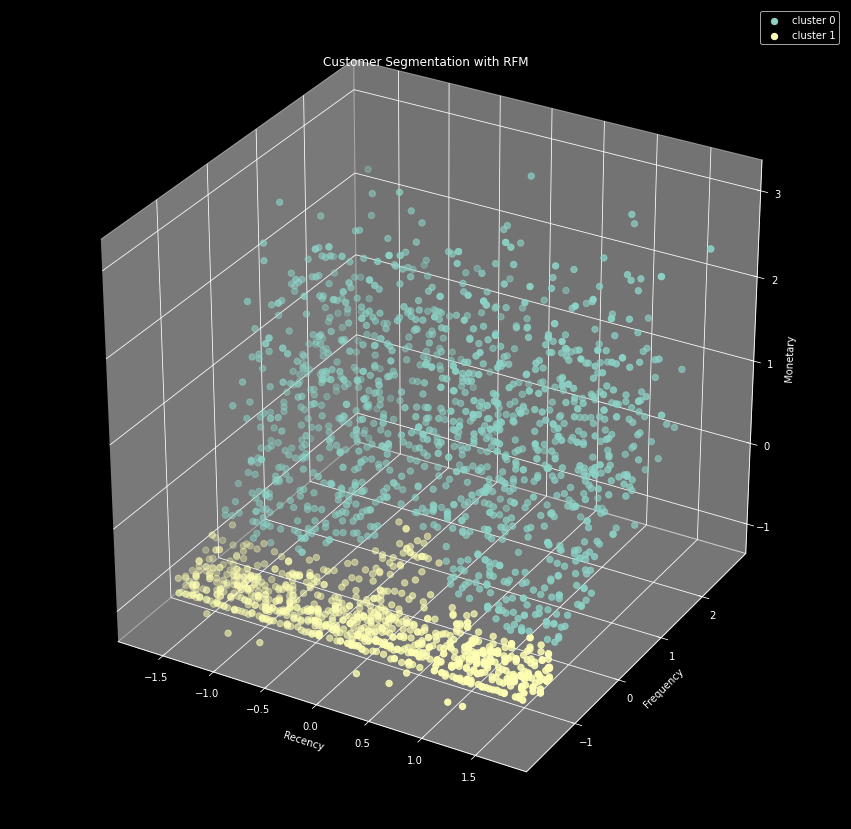

In [ ]:
with plt.style.context('dark_background'):
  fig = plt.figure(figsize = (15,15))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(rfm_normalized[y_clusters == 0]['Recency'],rfm_normalized[y_clusters == 0]['Frequency'],rfm_normalized[y_clusters == 0]['Monetary'], s = 40 , label = "cluster 0")
  ax.scatter(rfm_normalized[y_clusters == 1]['Recency'],rfm_normalized[y_clusters == 1]['Frequency'],rfm_normalized[y_clusters == 1]['Monetary'], s = 40 , label = "cluster 1")
  ax.set_xlabel('Recency')
  ax.set_ylabel('Frequency')
  ax.set_zlabel('Monetary')
  ax.legend()
  plt.title("Customer Segmentation with RFM")
  plt.show()

>- Bisa dilihat bahwa **Cluster 0** memiliki **High Frequency**, **High Monetary** dan memiliki persebaran nilai **Recency yang merata**.
- Sedangkan untuk **Cluster 1** memiliki **Less Frequency**, **Less Monetary** dan memiliki persebaran nilai **Recency yang merata**.

##### Customer Segmentation 

> Berdasarkan clustering yang dilakukan bisa didapat dua tipe customer :
- *Cluster 0 (Potential Customer)* : High Frequency, High Monetary and Spread Evenly Recency. Customer tipe ini sudah tertarik untuk melakukan pembelian ataupun menghabiskan uang yang cukup banyak di perusahaan kita, hanya saja recency nya tersebar terlalu merata, sedangkan seharusnya bisa **diminimalkan lagi agar menjadi Less Recency** dan menghasilkan Good Customer (Cluster Customer yang ingin dicapai dengan model RFM), Jadi rekomendasi yang kami berikan adalah, kita bisa **memberikan small offer kepada customer yg recencynya tinggi agar tetap membeli di perusahaan kita**, agar tetap membeli di perushaan kita.
- *Cluster 1 (Unreachable Customer)* : Less Frequency , Less Monetary, Spread Evenly Recency. Customer tipe ini adalah Customer yang belum tertarik untuk melakukan banyak pembelian ataupun menghabiskan banyak uang di perusahaan kita, padahal kita tau Customer tipe ini adalah Customer Lama (dilihat dari waktu mulai berlangganannya), jadi rekomendasi yang kami berikan adalah kita **perlu menjangkau kembali** Cluster dengan tipe ini, misalnya dengan **big offer untuk Customer lama yang melakukan pembelian kembali**.

## Customer Offer Acceptance Analysis [Task 2]

> Bagaimana kecenderungan customer menerima suatu tawaran lebih dari sekali dan kira-kira butuh berapa kali penawaran hingga customer dapat menerima tawaran?

###### Melihat kecenderungan customer menerima suatu tawaran lebih dari sekali

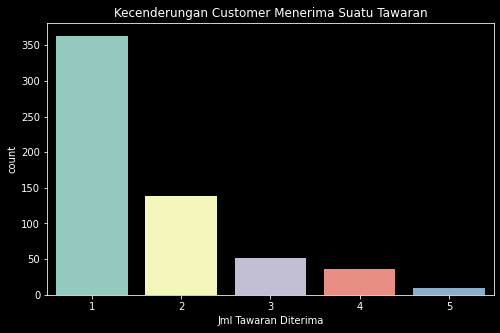

In [ ]:
with plt.style.context('dark_background'):
  jumlah_tawaran_diterima = dataset[dataset['Jml Tawaran Diterima']>0]
  plt.figure(figsize=(8, 5))
  countplot('Jml Tawaran Diterima',jumlah_tawaran_diterima)
  plt.title("Kecenderungan Customer Menerima Suatu Tawaran")
  plt.show()

> Bisa dilihat bahwa kecenderungan Customer dalam menerima suatu tawaran menurun secara geometris, Kebanyakan Customer hanya menerima tawaran sekali, dan lebih hanya sedikit yang menerima 5 tawaran, bahkan tidak ada yg menerima hingga 6 tawaran (seluruh tawaran)

###### Melihat kecenderungan customer mulai menerima suatu tawaran

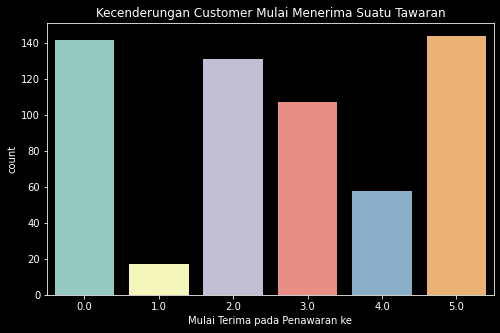

In [ ]:
with plt.style.context('dark_background'):
  Mulai_Terima_Penawaran = dataset[dataset['Mulai Terima pada Penawaran ke']!=np.inf]
  plt.figure(figsize=(8, 5))
  countplot('Mulai Terima pada Penawaran ke',Mulai_Terima_Penawaran)
  plt.title("Kecenderungan Customer Mulai Menerima Suatu Tawaran")
  plt.show()

In [ ]:
kecenderungan_tawaran_mulai_diterima = pd.DataFrame()
kecenderungan_tawaran_mulai_diterima['Count'] = Mulai_Terima_Penawaran.groupby("Mulai Terima pada Penawaran ke")['Jml Tawaran Diterima'].count()
total_tawaran_mulai_diterima = kecenderungan_tawaran_mulai_diterima['Count'].sum()
kecenderungan_tawaran_mulai_diterima['Percentage'] = kecenderungan_tawaran_mulai_diterima['Count']/total_tawaran_mulai_diterima*100
kecenderungan_tawaran_mulai_diterima

,Count,Percentage
Mulai Terima pada Penawaran ke,,
0.0,142,23.706177
1.0,17,2.838063
2.0,131,21.869783
3.0,107,17.863105
4.0,58,9.682805
5.0,144,24.040067


> 
- Bisa kita lihat bahwa customer cenderung mulai menerima suatu tawaran pada tawaran terakhir, sehingga butuh 5 tawaran sebelumnya untuk seorang Customer mau menerima tawaran yang diberikan. 
- Kemudian kita bisa menganalisis juga bahwa hanya 21% customer yang menerima tawaran di tawaran pertama (dari seluruh customer yang menerima suatu tawaran) 

###### Kesimpulan

> Dari analisis diatas, kami menyimpulkan bahwa ada kemungkinan customer tidak tertarik pada tawaran-tawaran yang diberikan terutama pada tawaran pertama yang diberikan. Oleh karena ini, kami memberikan rekomendasi agar pada tawaran pertama diberikan big offer(tawaran yg menarik), dengan memberikan tawaran di awal yang menarik, akan meningkatkan peluang suatu tawaran untuk diterima lebih dari sekali, karena yang menyebabkan tidak banyak tawaran yang diterima lebih dari sekali adalah kecenderungan seorang customer untuk menerima tawaran di tawaran pertama yang masih kurang (hanya 21%)

## Profitable Comodity Analysis [Task 3]

> Apa saja jenis komoditas yang diminati oleh customer dari masing-masing pulau dan pulau mana yang memberikan keuntungan terbesar pada setiap komoditas?

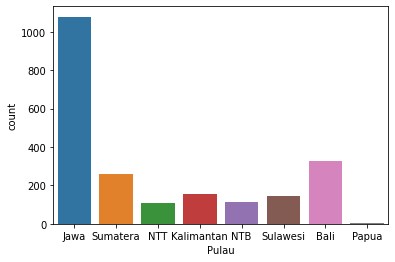

In [ ]:
countplot('Pulau', dataset)

In [ ]:
dataset.groupby('Pulau').sum()

,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Umur,Mulai Terima pada Penawaran ke,Terima Penawaran 0,Terima Penawaran 1,Terima Penawaran 2,Terima Penawaran 3,Terima Penawaran 4,Terima Penawaran 5,Jml Tawaran Diterima,Recency,Frequency,Monetary
Pulau,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bali,671,1.808937e+10,159,157,-987305,16270,97106582.0,4553533.0,40420740.0,6622735.0,4829269.0,9702958.0,793,1368.0,851.0,1944,1723.0,3,16969.0,inf,19,4,20,20,21,50,134,16270,4163.0,163235817.0
Jawa,2243,5.543123e+10,459,551,-3256925,53497,313898524.0,15936406.0,119158180.0,24028770.0,16042158.0,32629756.0,2434,4254.0,2719.0,6260,5676.0,14,56242.0,inf,77,16,81,88,88,175,525,53497,13233.0,521693794.0
Kalimantan,316,7.475890e+09,81,80,-474809,7368,41428606.0,2128689.0,18680420.0,3421755.0,2504177.0,4968214.0,357,622.0,413.0,870,812.0,0,8369.0,inf,7,0,9,6,13,23,58,7368,1905.0,73131861.0
NTB,241,6.002411e+09,47,52,-350226,5807,35502728.0,1823732.0,14590460.0,2689940.0,1852876.0,4189432.0,249,473.0,318.0,705,599.0,0,6068.0,inf,7,2,10,11,8,17,55,5807,1496.0,60649168.0
NTT,226,5.556804e+09,44,55,-322970,5374,31963706.0,1415839.0,14363420.0,2440005.0,1909127.0,3460114.0,284,475.0,275.0,635,590.0,0,5629.0,inf,7,0,8,6,5,13,39,5374,1385.0,55552211.0
Papua,8,1.730410e+08,0,2,-9469,80,1730674.0,10631.0,818680.0,56645.0,124583.0,106106.0,7,18.0,15.0,19,18.0,0,146.0,inf,0,0,1,0,0,2,3,80,52.0,2847319.0
Sulawesi,319,7.119703e+09,77,73,-442584,7437,34616026.0,2165919.0,16224320.0,2766605.0,2062567.0,4615194.0,364,578.0,336.0,775,804.0,1,7303.0,inf,7,2,13,11,5,13,51,7437,1689.0,62450631.0
Sumatera,555,1.373955e+10,108,145,-782991,12196,74406638.0,4002897.0,27888160.0,5625115.0,3799721.0,7656222.0,626,1120.0,674.0,1522,1359.0,2,13825.0,inf,18,6,17,24,21,37,123,12196,3316.0,123378753.0


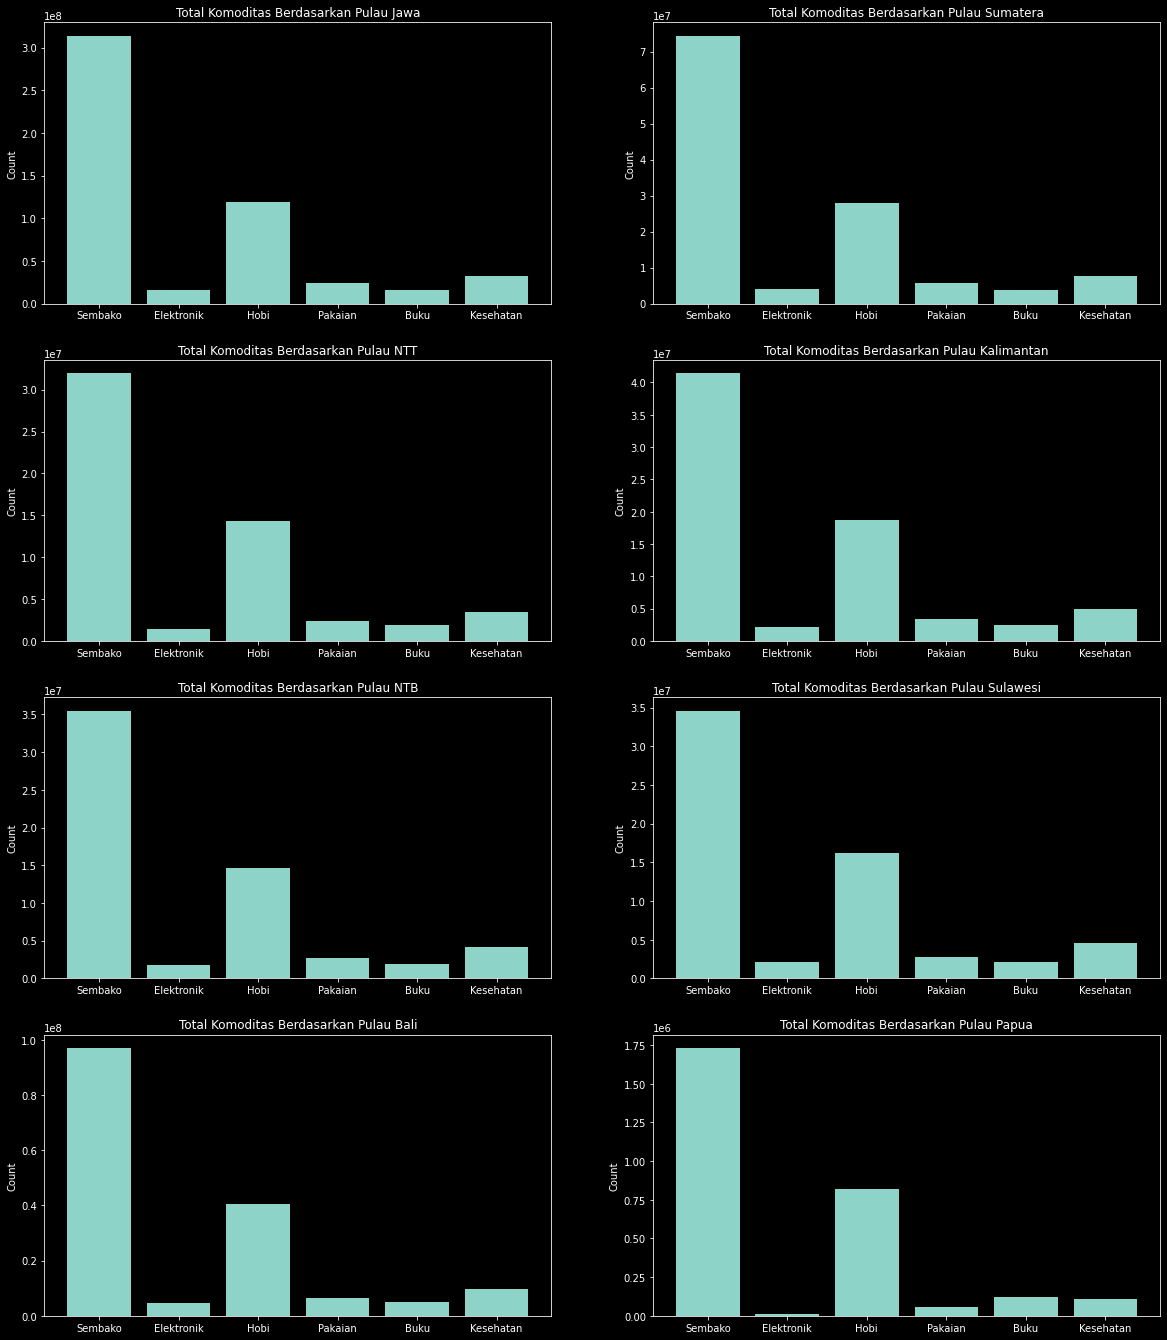

In [ ]:

pulau_list = dataset.Pulau.unique()
komoditas_list = ['Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan']
with plt.style.context('dark_background'):
  plt.figure(figsize=(20,30))
  size_category = len(pulau_list)
  row = (size_category//2)+1
  counter = 1
  for pulau in pulau_list :
    content = []
    for komoditas in komoditas_list :
      total = dataset[dataset['Pulau'] == pulau][komoditas].sum()
      content.append(total)
    df = pd.DataFrame({
      pulau: komoditas_list,
      'Count': content,
    })
    plt.subplot(row,2,counter)
    x_coords = np.arange(len(df))
    colors = ['#0000FF' for _ in range(len(df))]
    plt.bar(x_coords, df['Count'], tick_label=df[pulau])
    #plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Total Komoditas Berdasarkan Pulau ' +pulau)
    counter = counter+1
  plt.show()

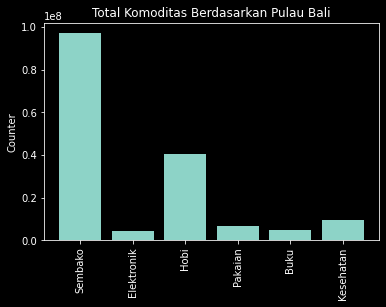

In [ ]:

pulau = dataset['Pulau']
sembako = dataset['Sembako']
elektronik = dataset['Elektronik']
hobi = dataset['Hobi']
pakaian = dataset['Pakaian']
buku = dataset['Buku']
kesehatan = dataset['Kesehatan']


total_sembako = dataset[dataset['Pulau'] == 'Bali']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'Bali']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'Bali']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'Bali']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'Bali']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'Bali']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'Bali': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Bali'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau Bali')
  plt.show()

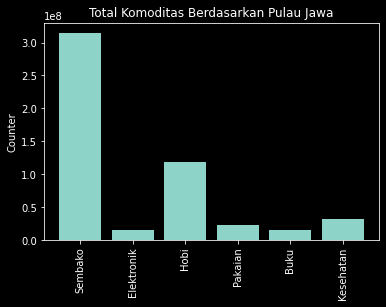

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'Jawa']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'Jawa']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'Jawa']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'Jawa']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'Jawa']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'Jawa']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'Jawa': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Jawa'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau Jawa')
  plt.show()

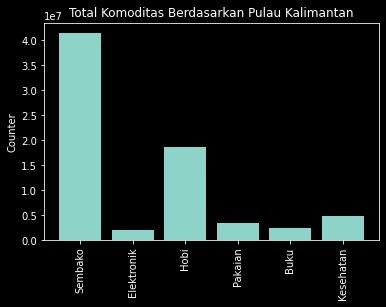

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'Kalimantan']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'Kalimantan']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'Kalimantan']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'Kalimantan']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'Kalimantan']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'Kalimantan']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'Kalimantan': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Kalimantan'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau Kalimantan')
  plt.show()

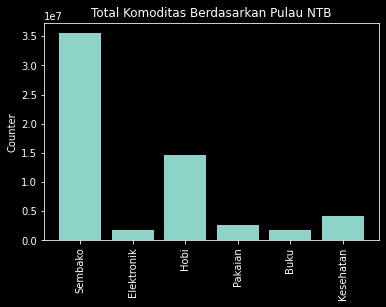

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'NTB']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'NTB']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'NTB']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'NTB']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'NTB']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'NTB']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'NTB': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['NTB'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau NTB')
  plt.show()

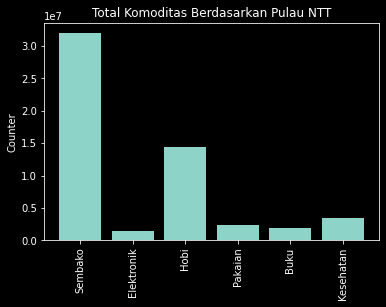

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'NTT']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'NTT']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'NTT']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'NTT']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'NTT']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'NTT']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'NTT': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
    x_coords = np.arange(len(df))
    colors = ['#0000FF' for _ in range(len(df))]
    plt.bar(x_coords, df['Counter'], tick_label=df['NTT'])
    plt.xticks(rotation=90)
    plt.ylabel('Counter')
    plt.title('Total Komoditas Berdasarkan Pulau NTT')
    plt.show()

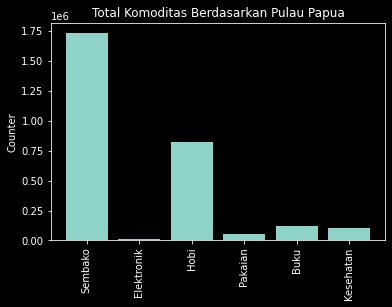

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'Papua']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'Papua']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'Papua']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'Papua']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'Papua']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'Papua']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'Papua': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Papua'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau Papua')
  plt.show()

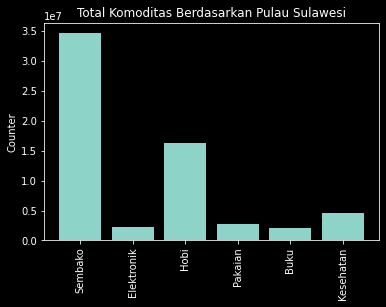

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'Sulawesi']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'Sulawesi']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'Sulawesi']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'Sulawesi']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'Sulawesi']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'Sulawesi']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'Sulawesi': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Sulawesi'])
  plt.xticks(rotation=90) 
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau Sulawesi')
  plt.show()

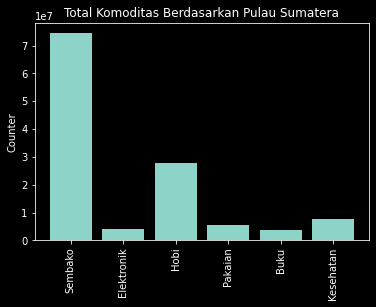

In [ ]:
total_sembako = dataset[dataset['Pulau'] == 'Sumatera']['Sembako'].sum()
total_elektronik = dataset[dataset['Pulau'] == 'Sumatera']['Elektronik'].sum()
total_hobi = dataset[dataset['Pulau'] == 'Sumatera']['Hobi'].sum()
total_pakaian = dataset[dataset['Pulau'] == 'Sumatera']['Pakaian'].sum()
total_buku = dataset[dataset['Pulau'] == 'Sumatera']['Buku'].sum()
total_kesehatan = dataset[dataset['Pulau'] == 'Sumatera']['Kesehatan'].sum()

kolom = ('Sembako','Elektronik','Hobi','Pakaian','Buku','Kesehatan')
counter = (total_sembako,total_elektronik,total_hobi,total_pakaian,total_buku,total_kesehatan)
           
df = pd.DataFrame({
    'Sumatera': kolom,
    'Counter': counter,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Sumatera'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Komoditas Berdasarkan Pulau Sumatera')
  plt.show()

Jenis komoditas yang diminati oleh customer dari masing - masing pulau :


1.   Bali : komoditas Sembako
2.   Jawa : komoditas Sembako
3.   Kalimantan : komoditas Sembako
4.   NTB : komoditas Sembako
5.   NTT : komoditas Sembako
6.   Papua : komoditas Sembako
7.   Sulawesi : komoditas Sembako
8.   Sumatera : komoditas Sembako



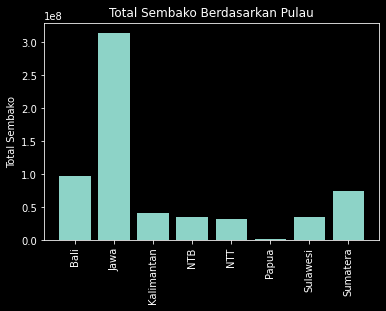

In [ ]:
sembako = dataset['Sembako']
elektronik = dataset['Elektronik']
hobi = dataset['Hobi']
pakaian = dataset['Pakaian']
buku = dataset['Buku']
kesehatan = dataset['Kesehatan']

pulau = dataset['Pulau']

kolom = ("Bali", "Jawa", "Kalimantan", "NTB", "NTT","Papua","Sulawesi", "Sumatera")
total_sembako = dataset.groupby('Pulau')['Sembako'].sum()
total_elektronik = dataset.groupby('Pulau')['Elektronik'].sum()
total_hobi = dataset.groupby('Pulau')['Hobi'].sum()
total_pakaian = dataset.groupby('Pulau')['Pakaian'].sum()
total_buku = dataset.groupby('Pulau')['Buku'].sum()
total_kesehatan = dataset.groupby('Pulau')['Kesehatan'].sum()

df = pd.DataFrame({
    'Pulau': kolom,
    'Total Sembako': total_sembako,
})

#df.sort_values(by='Pulau', inplace=True)

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total Sembako'], tick_label=df['Pulau'])
  plt.xticks(rotation=90)
  plt.ylabel('Total Sembako')
  plt.title('Total Sembako Berdasarkan Pulau')
  plt.show()

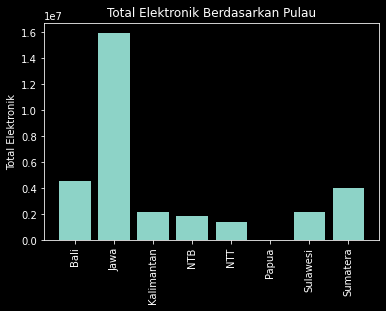

In [ ]:
kolom = ("Bali", "Jawa", "Kalimantan", "NTB", "NTT","Papua","Sulawesi", "Sumatera")
df = pd.DataFrame({
    'Pulau': kolom,
    'Total Elektronik': total_elektronik,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total Elektronik'], tick_label=df['Pulau'])
  plt.xticks(rotation=90)
  plt.ylabel('Total Elektronik')
  plt.title('Total Elektronik Berdasarkan Pulau')
  plt.show()

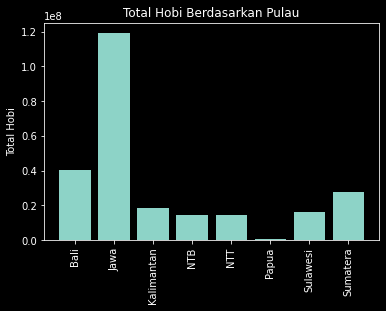

In [ ]:
kolom = ("Bali", "Jawa", "Kalimantan", "NTB", "NTT","Papua","Sulawesi", "Sumatera")
df = pd.DataFrame({
    'Pulau': kolom,
    'Total Hobi': total_hobi,
})
with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total Hobi'], tick_label=df['Pulau'])
  plt.xticks(rotation=90)
  plt.ylabel('Total Hobi')
  plt.title('Total Hobi Berdasarkan Pulau')
  plt.show()

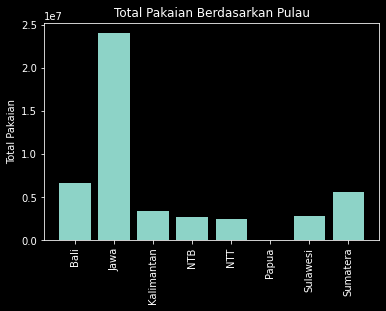

In [ ]:
kolom = ("Bali", "Jawa", "Kalimantan", "NTB", "NTT","Papua","Sulawesi", "Sumatera")
df = pd.DataFrame({
    'Pulau': kolom,
    'Total Pakaian': total_pakaian,
})

with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total Pakaian'], tick_label=df['Pulau'])
  plt.xticks(rotation=90)
  plt.ylabel('Total Pakaian')
  plt.title('Total Pakaian Berdasarkan Pulau')
  plt.show()

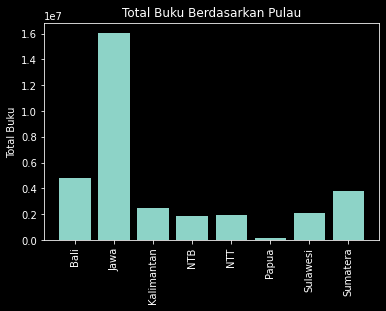

In [ ]:
kolom = ("Bali", "Jawa", "Kalimantan", "NTB", "NTT","Papua","Sulawesi", "Sumatera")
df = pd.DataFrame({
    'Pulau': kolom,
    'Total Buku': total_buku,
})
with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total Buku'], tick_label=df['Pulau'])
  plt.xticks(rotation=90)
  plt.ylabel('Total Buku')
  plt.title('Total Buku Berdasarkan Pulau')
  plt.show()

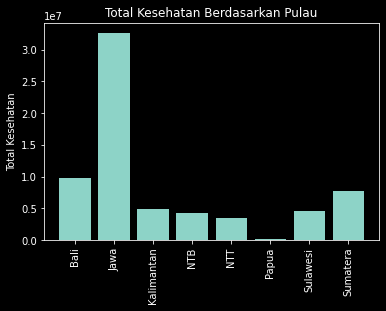

In [ ]:
kolom = ("Bali", "Jawa", "Kalimantan", "NTB", "NTT","Papua","Sulawesi", "Sumatera")
df = pd.DataFrame({
    'Pulau': df.index,
    'Total Kesehatan': total_kesehatan,
})
with plt.style.context('dark_background'):
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total Kesehatan'], tick_label=df['Pulau'])
  plt.xticks(rotation=90)
  plt.ylabel('Total Kesehatan')
  plt.title('Total Kesehatan Berdasarkan Pulau')
  plt.show()

Pulau yang memberikan keuntungan terbesar pada setiap Komoditas 


1.   Sembako = Pulau Jawa
2.   Elektronik = Pulau Jawa
3.   Hobi = Pulau Jawa
4.   Pakaian = Pulau Jawa
5.   Buku = Pulau Jawa
6.   Kesehatan = Pulau Jawa



Berdasarkan analisis Komoditas yang paling diminati di setiap Pulau maka Sembako yang paling banyak diminati kemudian peringkat 2 paling diminati adalah hobi. 


Maka strategi marketing yang bisa dilakukan adalah 
1. Meningkatkan kualitas dan variasi terhadap komoditas lain seperti elektronik, buku, pakaian, dan kesehatan. 
2. Meningkatkan penawaran dengan memberikan promo menarik pada komoditas tersebut. 
3. Meningkatkan promosi di luar pulau jawa agar penjualan lebih merata di seluruh pulau


## Platform Preference vs Customer 



Demographic Analysis [Task 4]

> Bagaimana hubungan jenis platform yang sering customer pakai jika dibandingkan dengan demografi (umur, pekerjaan, status kawin, dsb.)?

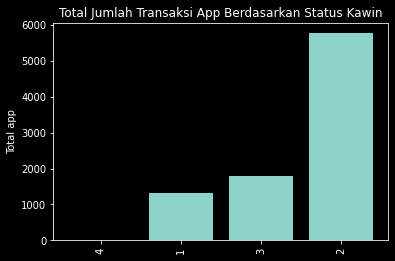

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

status = ("1", "2", "3", "4")
app = dataset.groupby('Status Kawin')['Jml Transaksi App'].sum()
web = dataset.groupby('Status Kawin')['Jml Transaksi Web'].sum()
outlet = dataset.groupby('Status Kawin')['Jml Transaksi Outlet'].sum()

df = pd.DataFrame({
    'Status': status,
    'Total app': app,
})

with plt.style.context('dark_background'):
  df.sort_values(by='Total app', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total app'], tick_label=df['Status'])
  plt.xticks(rotation=90)
  plt.ylabel('Total app')
  plt.title('Total Jumlah Transaksi App Berdasarkan Status Kawin')
  plt.show()

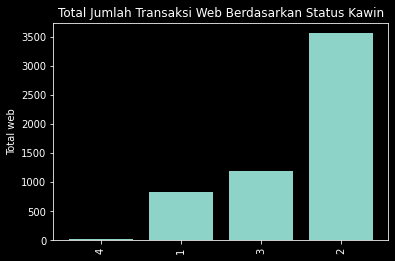

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
status = ("1", "2", "3", "4")
df = pd.DataFrame({
    'Status': status,
    'Total web': web,
})
with plt.style.context('dark_background'):
  df.sort_values(by='Total web', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total web'], tick_label=df['Status'])
  plt.xticks(rotation=90)
  plt.ylabel('Total web')
  plt.title('Total Jumlah Transaksi Web Berdasarkan Status Kawin')
  plt.show()

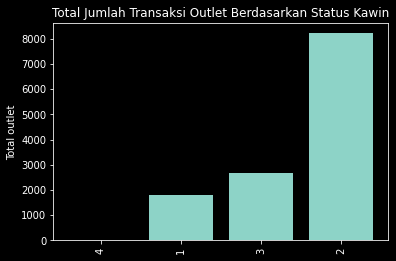

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
status = ("1", "2", "3", "4")
df = pd.DataFrame({
    'Status': status,
    'Total outlet': outlet,
})
with plt.style.context('dark_background'):
  df.sort_values(by='Total outlet', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total outlet'], tick_label=df['Status'])
  plt.xticks(rotation=90)
  plt.ylabel('Total outlet')
  plt.title('Total Jumlah Transaksi Outlet Berdasarkan Status Kawin')
  plt.show()

Penggunaan jenis platform berdasarkan Status kawin

*   Platform App paling banyak digunakan oleh status 2 yaitu Menikah dan berumahtangga
*   Platform Web paling banyak digunakan oleh status 2 yaitu Menikah dan berumahtangga
*   Platform Outlet paling banyak digunakan oleh status 2 yaitu Menikah dan berumahtangga





Berdasarkan analisis penggunaan platform berdasarkan status kawin maka strategi marketing yang dapat diterapkan adalah menambahkan variasi produk yang dijual agar semua kalangan dari berbagai status tertarik untuk melakukan transaksi pada perusahaan marketing ini. Hal ini karena terlihat bahwa yang sering melakukan transaksi adalah yang statusnya menikah dan berumahtangga. Hal ini bisa saja karena produk yang dijual memang lebih menawarkan produk yang dibutuhkan oleh orang yang berumahtangga.

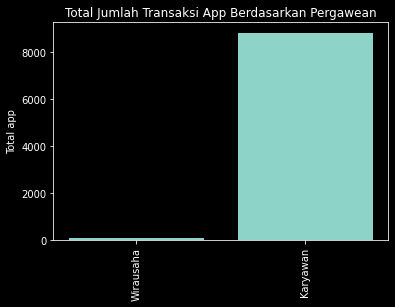

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

job = ("Karyawan", "Wirausaha")
app = dataset.groupby('Pekerjaan')['Jml Transaksi App'].sum()
web = dataset.groupby('Pekerjaan')['Jml Transaksi Web'].sum()
outlet = dataset.groupby('Pekerjaan')['Jml Transaksi Outlet'].sum()

df = pd.DataFrame({
    'Job': job,
    'Total app': app,
})
with plt.style.context('dark_background'):
  df.sort_values(by='Total app', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total app'], tick_label=df['Job'])
  plt.xticks(rotation=90)
  plt.ylabel('Total app')
  plt.title('Total Jumlah Transaksi App Berdasarkan Pergawean')
  plt.show()

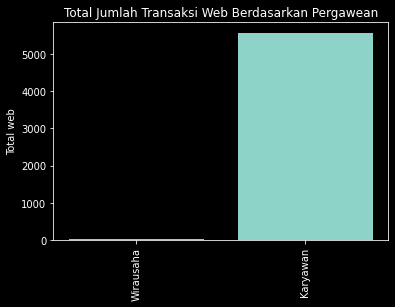

In [ ]:
job = ("Karyawan", "Wirausaha")

df = pd.DataFrame({
    'Job': job,
    'Total web': web,
})
with plt.style.context('dark_background'):
  df.sort_values(by='Total web', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total web'], tick_label=df['Job'])
  plt.xticks(rotation=90)
  plt.ylabel('Total web')
  plt.title('Total Jumlah Transaksi Web Berdasarkan Pergawean')
  plt.show()

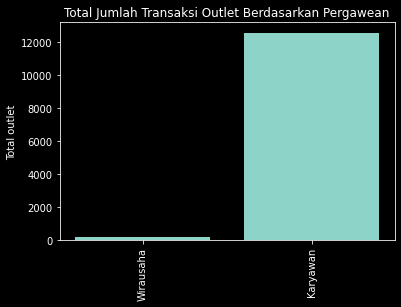

In [ ]:
job = ("Karyawan", "Wirausaha")

df = pd.DataFrame({
    'Job': job,
    'Total outlet': outlet,
})
with plt.style.context('dark_background'):
  df.sort_values(by='Total outlet', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Total outlet'], tick_label=df['Job'])
  plt.xticks(rotation=90)
  plt.ylabel('Total outlet')
  plt.title('Total Jumlah Transaksi Outlet Berdasarkan Pergawean')
  plt.show()

Penggunaan jenis platform berdasarkan Pekerjaan



*   Platform App paling banyak digunakan oleh Karyawan
*   Platform Web paling banyak digunakan oleh Karyawan
*    Platform Outlet paling banyak digunakan oleh Karyawan


Berdasarkan analisis penggunaan platform berdasarkan jenis pekerjaan  maka strategi marketing yang dapat diterapkan adalah meningkatkan promosi agar semua kalangan bisa dijangkau oleh penjual. Hal ini karena ternyata kalangan karyawan saja yang lebih sering melakukan transaksi melalui berbagai platform

In [ ]:
lansia = dataset[dataset['Umur'] > 60]['Umur']
lansia

2       63.0
5       63.0
6       67.0
8       67.0
9       67.0
        ... 
2150    67.0
2155    63.0
2159    67.0
2174    61.0
2175    61.0
Name: Umur, Length: 606, dtype: float64

In [ ]:
muda = dataset[dataset['Umur'] < 60]['Umur']
muda

0       51.0
3       54.0
4       32.0
7       54.0
11      42.0
        ... 
2193    45.0
2194    44.0
2195    45.0
2196    43.0
2197    52.0
Name: Umur, Length: 1556, dtype: float64

Berdasarkan usia yang ada pada dataset kami mencoba mengkategorikannya kedalam dua kelompok yaitu :
*   Usia Muda = 25 - 60
*   Usia Lansia = >60




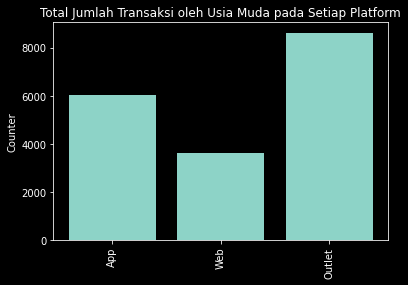

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

platform = ("App", "Web", "Outlet")

app_muda = dataset[dataset['Umur'] < 60]['Jml Transaksi App'].sum()
web_muda = dataset[dataset['Umur'] < 60]['Jml Transaksi Web'].sum()
outlet_muda = dataset[dataset['Umur'] < 60]['Jml Transaksi Outlet'].sum()

app_lansia = dataset[dataset['Umur'] >= 60 ]['Jml Transaksi App'].sum()
web_lansia = dataset[dataset['Umur'] >= 60 ]['Jml Transaksi Web'].sum()
outlet_lansia = dataset[dataset['Umur'] >= 60 ]['Jml Transaksi Outlet'].sum()

counter_muda = (app_muda, web_muda, outlet_muda)
counter_lansia = (app_lansia, web_lansia, outlet_lansia)

df = pd.DataFrame({
    'Platform': platform,
    'Counter': counter_muda,
})

with plt.style.context('dark_background'):
  #df.sort_values(by='Total app', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Platform'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Jumlah Transaksi oleh Usia Muda pada Setiap Platform')
  plt.show()

Berdasarkan grafik tersebut Penggunaan Platform oleh usia Muda memiliki urutan paling banyak sebagai berikut


1.   Outlet
2.   App
3.   Web



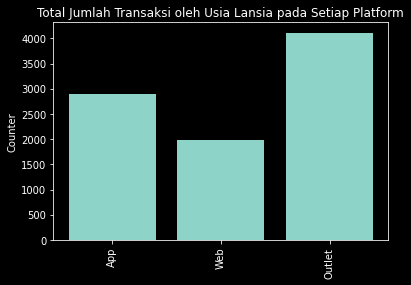

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

platform = ("App", "Web", "Outlet")

app_muda = dataset[dataset['Umur'] < 60]['Jml Transaksi App'].sum()
web_muda = dataset[dataset['Umur'] < 60]['Jml Transaksi Web'].sum()
outlet_muda = dataset[dataset['Umur'] < 60]['Jml Transaksi Outlet'].sum()

app_lansia = dataset[dataset['Umur'] >= 60 ]['Jml Transaksi App'].sum()
web_lansia = dataset[dataset['Umur'] >= 60 ]['Jml Transaksi Web'].sum()
outlet_lansia = dataset[dataset['Umur'] >= 60 ]['Jml Transaksi Outlet'].sum()

counter_muda = (app_muda, web_muda, outlet_muda)
counter_lansia = (app_lansia, web_lansia, outlet_lansia)

df = pd.DataFrame({
    'Platform': platform,
    'Counter': counter_lansia,
})

with plt.style.context('dark_background'):
  #df.sort_values(by='Total app', inplace=True)
  x_coords = np.arange(len(df))
  colors = ['#0000FF' for _ in range(len(df))]
  plt.bar(x_coords, df['Counter'], tick_label=df['Platform'])
  plt.xticks(rotation=90)
  plt.ylabel('Counter')
  plt.title('Total Jumlah Transaksi oleh Usia Lansia pada Setiap Platform')
  plt.show()

Berdasarkan grafik tersebut Penggunaan Platform oleh usia Lansia memiliki urutan paling banyak sebagai berikut


1.   Outlet
2.   App
3.   Web

Berdasarkan analisis penggunaan platform berdasarkan usia maka strategi marketing yang dapat diterapkan adalah 
meningkatkan kualitas pelayanan di outlet karena baik usia muda maupun dewasa paling banyak transaksi melalui outlet

Selanjutnya perlu juga dilakukan peningkatan kualitas web dan app karena transaksi melalui web ternyata yang paling sedikit. Hal ini bisa jadi karena ada masalah pada fitur yang ada di web dan app. Sehingga kami merekomendasikan untuk dilakukan analisis lebih lanjut terhadap fitur yang ada di web dan app. 


## Customer Complaint Analysis and Prediction Model [Task 5]

> Informasi apa yang bisa kalian gali dari pelanggan yang melakukan komplain? Apakah komplain dapat diprediksi?

In [ ]:
# Menampilkan data pelanggan yang melakukan komplain (atribut 'Komplain' = 1)
komplain = dataset.loc[dataset['Komplain'] == 1]

In [ ]:
komplain.head(5)

,Tanggal Lahir,Pekerjaan,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Komplain,Pulau,Urutan Terima Penawaran,Umur,Mulai Terima pada Penawaran ke,Terima Penawaran 0,Terima Penawaran 1,Terima Penawaran 2,Terima Penawaran 3,Terima Penawaran 4,Terima Penawaran 5,Jml Tawaran Diterima,Recency,Frequency,Monetary
200,1988-11-14,Karyawan,2,15716000.0,1,0,-3255,8,16558.0,5877.0,30560.0,8215.0,7861.0,26702.0,3,3.0,0.0,4,8.0,1,Bali,-1,33.0,inf,0,0,0,0,0,0,0,8,7.0,95773.0
347,1983-02-26,Karyawan,3,31788000.0,1,0,-2762,15,16558.0,7877.0,23560.0,215.0,8861.0,6702.0,3,3.0,0.0,4,5.0,1,Bali,-1,38.0,inf,0,0,0,0,0,0,0,15,7.0,63773.0
546,1959-07-07,Karyawan,2,57957000.0,0,1,-2975,24,290558.0,59877.0,177560.0,77215.0,5861.0,29702.0,7,4.0,6.0,8,3.0,1,Sumatera,-1,62.0,inf,0,0,0,0,0,0,0,24,18.0,640773.0
649,1977-09-14,Karyawan,3,37774000.0,2,0,-3325,28,173558.0,8877.0,107560.0,7215.0,2861.0,24702.0,4,7.0,2.0,3,9.0,1,Jawa,"[2, 5]",44.0,2.0,0,0,1,0,0,1,2,28,12.0,324773.0
714,1951-05-10,Karyawan,1,22263000.0,1,1,-2752,31,17558.0,877.0,2560.0,215.0,861.0,2702.0,2,1.0,0.0,3,6.0,1,Jawa,-1,70.0,inf,0,0,0,0,0,0,0,31,4.0,24773.0


In [ ]:
komplain.shape

(20, 34)

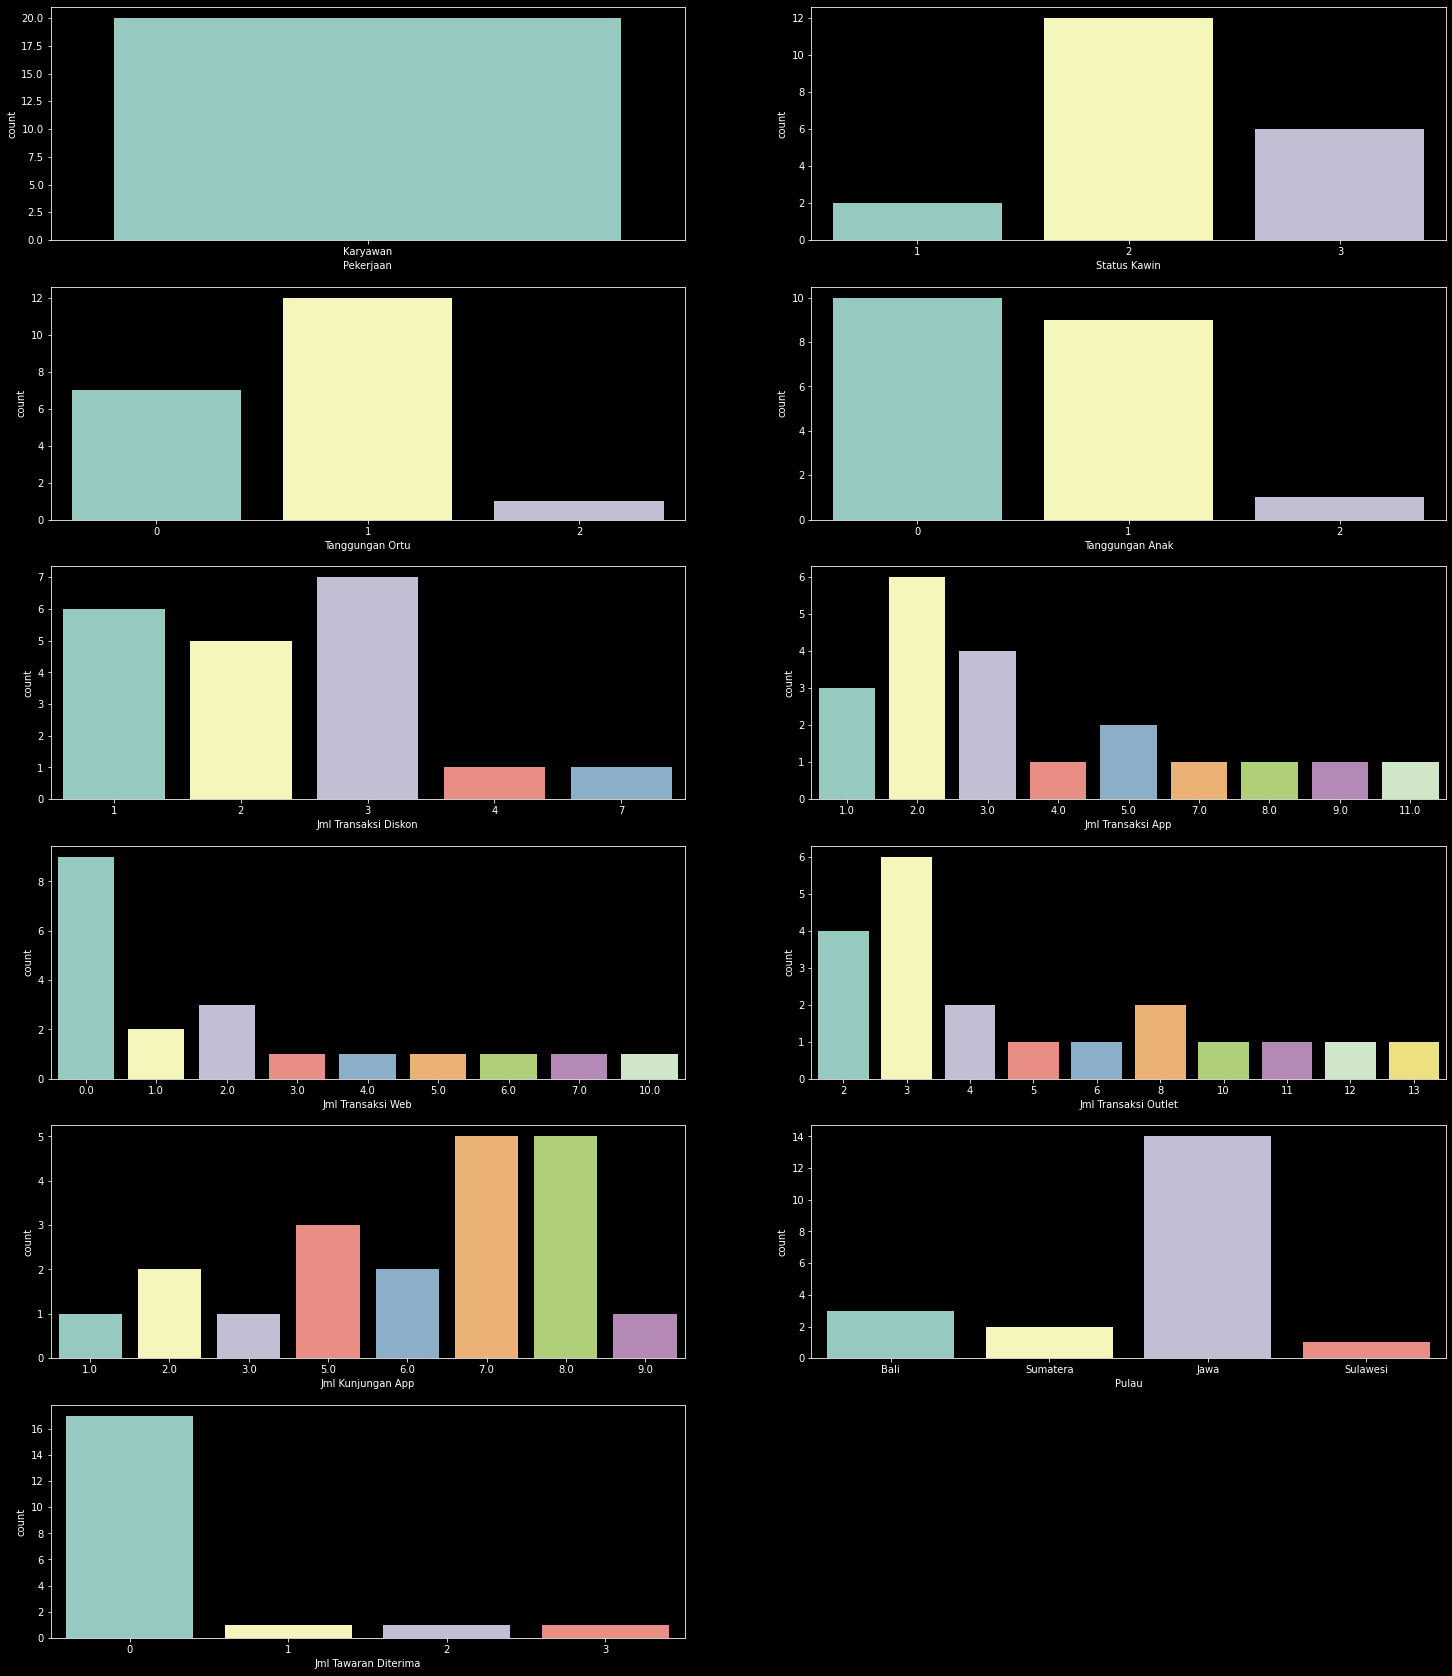

In [ ]:
with plt.style.context('dark_background'):
  attr_arr = ["Pekerjaan", "Status Kawin", "Tanggungan Ortu", "Tanggungan Anak", "Jml Transaksi Diskon", "Jml Transaksi App", "Jml Transaksi Web", "Jml Transaksi Outlet", "Jml Kunjungan App", "Pulau", "Jml Tawaran Diterima"]

  plt.figure(figsize=(25,30))
  size_category = len(attr_arr)
  row = (size_category//2)+1
  counter = 1
  for elem in attr_arr:
      plt.subplot(row,2,counter)
      countplot(elem, komplain)
      counter = counter+1

  plt.show()

> Berikut merupakan informasi yang didapatkan dari 20 orang customer yang pernah melakukan komplain. Customer yang paling banyak melakukan komplain, yaitu:


* Customer yang melakukan komplain semuanya merupakan Karyawan
* Customer yang sudah menikah/berumah tangga, yaitu sebanyak 12 customer
* Customer yang memiliki jumlah tanggungan orang tua sebanyak 1 orang, yaitu sebanyak 12 customer
* Customer yang tidak memiliki tanggungan anak, yaitu sebanyak 10 customer
* Customer yang melakukan transaksi dengan diskon sejumlah 3 kali, yaitu sebanyak 7 customer
* Customer yang melakukan transaksi melalui app sejumlah 2 kali, yaitu sebanyak 6 customer
* Customer yang tidak pernah melakukan transaksi melalui web, yaitu sebanyak 9 customer
* Customer yang melakukan transaksi melalui outlet sejumlah 3 kali, yaitu sebanyak 6 customer 
* Customer yang mengunjungi app sejumlah 7 atau 8 kali, yaitu sebanyak 5 customer 
* Customer yang berdomisili di pulau Jawa, yaitu sebanyak 14 customer  
* Customer yang tidak pernah menerima tawaran, yaitu sebanyak 17 customer 



###### Apakah komplain dapat diprediksi?

In [ ]:
komplain = dataset[dataset['Komplain'] == 1]
tidak_komplain = dataset[dataset['Komplain'] == 0]

print("Jumlah customer yang pernah melakukan komplain: " + str(komplain.shape[0]))
print("Jumlah customer yang tidak pernah melakukan komplain: " + str(tidak_komplain.shape[0]))

Jumlah customer yang pernah melakukan komplain: 20
Jumlah customer yang tidak pernah melakukan komplain: 2178


Perbandingan antara jumlah customer yang pernah melakukan komplain dan yang tidak pernah melakukan komplain cukup besar. Hal tersebut dapat mengindikasikan adanya *imbalance* pada data. 

Melakukan re-sample pada training set sebagai teknik untuk melakukan *imbalance classification*, salah satunya yaitu dengan teknik oversampling.

In [ ]:
X = dataset.drop(["Komplain", "Tanggal Lahir", "Urutan Terima Penawaran", "Mulai Terima pada Penawaran ke", "Pekerjaan", "Pulau"], axis = 1)
X.head()

,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Umur,Terima Penawaran 0,Terima Penawaran 1,Terima Penawaran 2,Terima Penawaran 3,Terima Penawaran 4,Terima Penawaran 5,Jml Tawaran Diterima,Recency,Frequency,Monetary
0,1,84835000.0,0,0,-2674,0,189558.0,8877.0,379560.0,111215.0,8861.0,24702.0,1,4.0,4.0,6,1.0,51.0,0,0,0,0,0,1,1,0,14.0,722773.0
1,3,57091000.0,0,0,-2675,0,464558.0,5877.0,64560.0,7215.0,861.0,37702.0,1,7.0,3.0,7,5.0,60.0,0,1,0,0,0,1,2,0,17.0,580773.0
2,2,67267000.0,0,1,-2708,0,134558.0,11877.0,59560.0,15215.0,2861.0,30702.0,1,3.0,2.0,5,2.0,63.0,0,0,0,0,0,0,0,0,10.0,254773.0
3,2,32474000.0,1,1,-2710,0,10558.0,877.0,1560.0,215.0,861.0,702.0,1,1.0,0.0,2,7.0,54.0,0,0,0,0,0,0,0,0,3.0,14773.0
4,3,21474000.0,1,0,-2743,0,6558.0,16877.0,24560.0,11215.0,861.0,34702.0,2,3.0,1.0,2,7.0,32.0,0,0,1,0,0,1,2,0,6.0,94773.0


In [ ]:
# Variabel dependen
y = dataset["Komplain"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Komplain, dtype: int64

In [ ]:
# Melakukan normalisasi data
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

dataset_norm = pd.DataFrame(data=X_scaled, columns=X.columns)

In [ ]:
# Menampilkan 10 baris sampel pertama yang sudah dinormalisasi
dataset_norm.head(n=10)

,Status Kawin,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App,Umur,Terima Penawaran 0,Terima Penawaran 1,Terima Penawaran 2,Terima Penawaran 3,Terima Penawaran 4,Terima Penawaran 5,Jml Tawaran Diterima,Recency,Frequency,Monetary
0,0.000000,0.127253,0.0,0.0,0.981402,0.0,0.154412,0.101266,0.674377,0.925000,0.096386,0.190476,0.066667,0.363636,0.4,0.461538,0.076923,0.464286,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.0,0.43750,0.390164
1,0.666667,0.085637,0.0,0.0,0.979971,0.0,0.379085,0.063291,0.113879,0.058333,0.000000,0.293651,0.066667,0.636364,0.3,0.538462,0.384615,0.625000,0.0,1.0,0.0,0.0,0.0,1.0,0.4,0.0,0.53125,0.312568
2,0.333333,0.100901,0.0,0.5,0.932761,0.0,0.109477,0.139241,0.104982,0.125000,0.024096,0.238095,0.066667,0.272727,0.2,0.384615,0.153846,0.678571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31250,0.134426
3,0.333333,0.048711,0.5,0.5,0.929900,0.0,0.008170,0.000000,0.001779,0.000000,0.000000,0.000000,0.066667,0.090909,0.0,0.153846,0.538462,0.517857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09375,0.003279
4,0.666667,0.032211,0.5,0.0,0.882690,0.0,0.004902,0.202532,0.042705,0.091667,0.000000,0.269841,0.133333,0.272727,0.1,0.153846,0.538462,0.125000,0.0,0.0,1.0,0.0,0.0,1.0,0.4,0.0,0.18750,0.046995
5,0.666667,0.107537,0.0,0.0,0.851216,0.0,0.274510,0.101266,0.731317,0.100000,0.385542,0.341270,0.066667,0.363636,0.7,0.384615,0.153846,0.678571,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.0,0.50000,0.457377
6,0.333333,0.095346,0.0,0.0,0.783977,0.0,0.628268,0.101266,0.448399,0.125000,0.409639,0.515873,0.066667,0.909091,1.0,0.538462,0.461538,0.750000,0.0,0.0,1.0,0.0,0.0,1.0,0.4,0.0,0.84375,0.621858
7,0.333333,0.067397,0.0,0.5,0.768240,0.0,0.063725,0.000000,0.019573,0.000000,0.000000,0.055556,0.066667,0.181818,0.1,0.230769,0.384615,0.517857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18750,0.049727
8,0.333333,0.097986,0.0,0.5,0.758226,0.0,0.313725,0.000000,0.181495,0.175000,0.385542,0.039683,0.200000,0.545455,0.2,0.692308,0.307692,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53125,0.294536
9,0.333333,0.097986,0.0,0.5,0.758226,0.0,0.313725,0.000000,0.181495,0.175000,0.385542,0.039683,0.200000,0.545455,0.2,0.692308,0.307692,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53125,0.294536


In [ ]:
# Variabel independen
X = X_scaled

print(X)

[[0.         0.12725262 0.         ... 0.         0.4375     0.39016393]
 [0.66666667 0.08563658 0.         ... 0.         0.53125    0.31256831]
 [0.33333333 0.1009006  0.         ... 0.         0.3125     0.13442623]
 ...
 [0.         0.06946507 0.5        ... 1.         0.375      0.16612022]
 [0.33333333 0.0987286  0.         ... 1.         0.59375    0.24617486]
 [0.33333333 0.14230664 0.         ... 1.         0.53125    0.42459016]]


In [ ]:
print(X)

[[0.         0.12725262 0.         ... 0.         0.4375     0.39016393]
 [0.66666667 0.08563658 0.         ... 0.         0.53125    0.31256831]
 [0.33333333 0.1009006  0.         ... 0.         0.3125     0.13442623]
 ...
 [0.         0.06946507 0.5        ... 1.         0.375      0.16612022]
 [0.33333333 0.0987286  0.         ... 1.         0.59375    0.24617486]
 [0.33333333 0.14230664 0.         ... 1.         0.53125    0.42459016]]


In [ ]:
# Melakukan splitting terhadap data train dan test (0.3 test_size)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

###### Random Oversampling

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score1 = mean(scores1)
scores2 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score2 = mean(scores2)
print('F-measure: %.3f' % score1)
print('Mean ROC AUC: %.3f' % score2)

F-measure: 0.983
Mean ROC AUC: 0.545


###### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score1 = mean(scores1)
scores2 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score2 = mean(scores2)
print('F-measure: %.3f' % score1)
print('Mean ROC AUC: %.3f' % score2)

F-measure: 0.970
Mean ROC AUC: 0.539


###### Borderline SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# define pipeline
steps = [('over', BorderlineSMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score1 = mean(scores1)
scores2 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score2 = mean(scores2)
print('F-measure: %.3f' % score1)
print('Mean ROC AUC: %.3f' % score2)

F-measure: 0.979
Mean ROC AUC: 0.552


###### Borderline-SMOTE SVM

In [ ]:
from imblearn.over_sampling import SVMSMOTE

# define pipeline
steps = [('over', SVMSMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score1 = mean(scores1)
scores2 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score2 = mean(scores2)
print('F-measure: %.3f' % score1)
print('Mean ROC AUC: %.3f' % score2)

F-measure: nan
Mean ROC AUC: nan


###### ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

# define pipeline
steps = [('over', ADASYN()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score1 = mean(scores1)
scores2 = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score2 = mean(scores2)
print('F-measure: %.3f' % score1)
print('Mean ROC AUC: %.3f' % score2)

F-measure: 0.970
Mean ROC AUC: 0.539


## Discount vs Offer Acceptance Analysis [Task 6]

> Seberapa sering discount diberikan ke customer? Adakah hubungan antara discount dengan offer acceptance?

In [ ]:
jml_trans_diskon_unik = dataset["Jml Transaksi Diskon"].unique()
jml_trans_diskon_unik

array([ 1,  2,  3,  0,  4, 12,  7,  5,  6, 11,  9,  8, 10, 15, 13])

In [ ]:
mulai_langganan = []

for i in jml_trans_diskon_unik:
  arr = []
  for j in range(len(dataset)):
    if dataset.iloc[j]["Jml Transaksi Diskon"] == i:
      arr.append(dataset.iloc[j]["Mulai Berlangganan"])
  mulai_langganan.append(max(arr))

In [ ]:
mulai_langganan

[-2662,
 -2661,
 -2661,
 -2668,
 -2664,
 -3247,
 -2665,
 -2722,
 -2692,
 -3120,
 -2911,
 -2687,
 -3004,
 -2667,
 -3198]

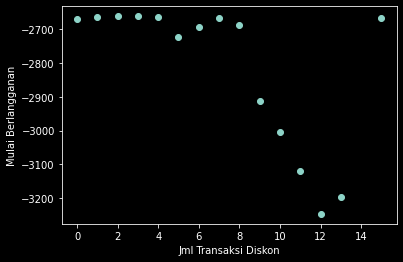

In [ ]:
with plt.style.context('dark_background'):
  plt.scatter(jml_trans_diskon_unik, mulai_langganan)
  plt.ylabel('Mulai Berlangganan')
  plt.xlabel('Jml Transaksi Diskon')
  plt.show()

**Adakah hubungan antara discount dengan offer acceptance?**

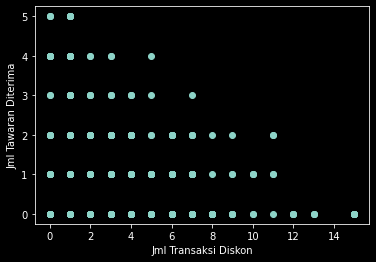

In [ ]:
with plt.style.context('dark_background'):
  plt.scatter(dataset["Jml Transaksi Diskon"], dataset["Jml Tawaran Diterima"])
  plt.ylabel('Jml Tawaran Diterima')
  plt.xlabel('Jml Transaksi Diskon')
  plt.show()

Diskon merupakan salah satu penawaran yang umum ditawarkan kepada customer pada suatu praktik bisnis. Namun, pada kasus ini tidak dipastikan bahwa penawaran yang diberikan hanya sebatas diskon saja, sehingga dapat pula diberikan jenis penawaran lainnya. Pada visualisasi tersebut digambarkan bahwa terdapat customer yang jumlah transaksi diskonnya 0, namun menerima sejumlah tawaran tertentu (yang bisa saja bukan jenis penawaran diskon).


Dari visualisasi tersebut, didapatkan pula informasi bahwa terdapat customer yang tidak menerima tawaran namun melakukan sejumlah transaksi diskon. Dengan begitu, kami menyimpulkan bahwa tawaran dapat diberikan hanya pada periode waktu tertentu, sedangkan transaksi diskon dihitung sejak customer mulai berlangganan.

## Customer Offer Acceptance Prediction Model [Task 7]

>Buatlah model untuk memprediksi kecenderungan customer untuk menerima tawaran ke-i sebagai tawaran pertama yang diterima! Apakah model dapat dioptimalkan (dengan model lain atau hyperparam tuning)?

#### Feature Selection

In [ ]:
train_data = dataset[dataset['Mulai Terima pada Penawaran ke']!=np.inf]
x = train_data.loc[:,'Status Kawin':'Jml Kunjungan App']
x['Recency'] = rfm['Recency']
x['Frequency'] = rfm['Frequency']
x['Monetary']= rfm['Monetary']
y = train_data['Mulai Terima pada Penawaran ke']

#### Standarisasi Data

In [ ]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
x_normalized = pd.DataFrame(x_normalized, columns=x.columns)

#### Handling Imbalanced Classification

In [ ]:
from collections import Counter
from sklearn.metrics import roc_auc_score

In [ ]:
oversample = BorderlineSMOTE(random_state =2021)
x, y = oversample.fit_resample(x_normalized, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2021)

In [ ]:
def evaluate_classifier_performance(classifier, y_test, x_test):
  with plt.style.context('dark_background'):
    print('F1 Macro Average:', f1_score(y_test, classifier.predict(x_test), average='macro'))
    print('F1 Micro Average:', f1_score(y_test, classifier.predict(x_test),average='micro'))
    print('ROC AUC: ', roc_auc_score(y_test, classifier.predict_proba(x_test), multi_class='ovr'))
    ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

#### Membuat Model dengan KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

F1 Macro Average: 0.5909573289774152
F1 Micro Average: 0.630057803468208
ROC AUC:  0.8666091474563649


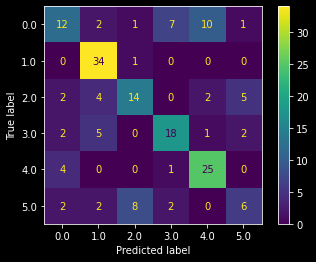

In [ ]:
evaluate_classifier_performance(knn, y_test, x_test)

terlihat hasil evaluasi untuk model yang dibuat

#### Optimisasi Model

> Menggunakan Grid Search CV untuk mendapatkan hyperparameter yang maksimal

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(algorithm='brute',metric='manhattan', 
                           metric_params=None, n_jobs=None, 
                           n_neighbors=5, weights='distance')
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

F1 Macro Average: 0.6702430274571837
F1 Micro Average: 0.7052023121387283
ROC AUC:  0.8855814337099329


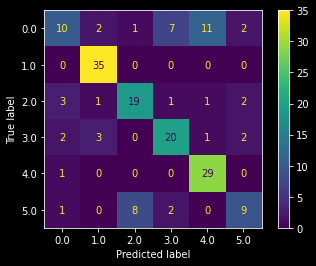

In [ ]:
evaluate_classifier_performance(knn, y_test, x_test)

terlihat bahwa skor yang didapatkan meningkat dibandingkan sebelumnya

## Sembako Nominal Transaction Prediction Model [Task 8]

> Buatlah model untuk memprediksi nominal transaksi sembako customer! Berdasarkan fitur yang digunakan, apakah terdapat data leakage?

### Linear Regression

In [ ]:
X = dataset[dataset.columns[3:19]]
Y = dataset['Sembako']
X

,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App
0,84835000.0,0,0,-2674,0,189558.0,8877.0,379560.0,111215.0,8861.0,24702.0,1,4.0,4.0,6,1.0
1,57091000.0,0,0,-2675,0,464558.0,5877.0,64560.0,7215.0,861.0,37702.0,1,7.0,3.0,7,5.0
2,67267000.0,0,1,-2708,0,134558.0,11877.0,59560.0,15215.0,2861.0,30702.0,1,3.0,2.0,5,2.0
3,32474000.0,1,1,-2710,0,10558.0,877.0,1560.0,215.0,861.0,702.0,1,1.0,0.0,2,7.0
4,21474000.0,1,0,-2743,0,6558.0,16877.0,24560.0,11215.0,861.0,34702.0,2,3.0,1.0,2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,66476000.0,0,1,-3140,99,372558.0,18877.0,126560.0,47215.0,48861.0,78702.0,2,5.0,2.0,11,4.0
2194,31056000.0,1,0,-3184,99,5558.0,10877.0,13560.0,3215.0,8861.0,16702.0,1,1.0,0.0,3,8.0
2195,46310000.0,1,0,-3234,99,185558.0,2877.0,88560.0,15215.0,5861.0,14702.0,2,6.0,1.0,5,8.0
2196,65819000.0,0,0,-3238,99,267558.0,38877.0,68060.0,12215.0,8861.0,63702.0,1,5.0,4.0,10,3.0


In [ ]:
Y

0       189558.0
1       464558.0
2       134558.0
3        10558.0
4         6558.0
          ...   
2193    372558.0
2194      5558.0
2195    185558.0
2196    267558.0
2197    169558.0
Name: Sembako, Length: 2198, dtype: float64

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized

,Penghasilan per Tahun,Tanggungan Ortu,Tanggungan Anak,Mulai Berlangganan,Transaksi Terakhir,Sembako,Elektronik,Hobi,Pakaian,Buku,Kesehatan,Jml Transaksi Diskon,Jml Transaksi App,Jml Transaksi Web,Jml Transaksi Outlet,Jml Kunjungan App
0,1.294638,-0.824309,-0.930415,1.690910,-1.697244,-0.313433,-0.322499,1.933732,3.203269,-0.332925,-0.207296,-0.685211,-0.020138,0.552277,0.064252,-1.853274
1,0.211358,-0.824309,-0.930415,1.685953,-1.697244,0.571848,-0.492271,-0.366204,-0.517490,-0.761864,0.247186,-0.685211,1.124600,0.171862,0.372608,-0.116731
2,0.608686,-0.824309,0.903713,1.522384,-1.697244,-0.490490,-0.152728,-0.402711,-0.231278,-0.654629,0.002465,-0.685211,-0.401717,-0.208553,-0.244103,-1.419138
3,-0.749827,1.033979,0.903713,1.512471,-1.697244,-0.889671,-0.775224,-0.826191,-0.767926,-0.761864,-1.046339,-0.685211,-1.164875,-0.969384,-1.169171,0.751541
4,-1.179328,1.033979,-0.930415,1.348902,-1.697244,-0.902548,0.130225,-0.658259,-0.374384,-0.761864,0.142306,-0.168718,-0.401717,-0.588969,-1.169171,0.751541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.577801,-0.824309,0.903713,-0.618883,1.721502,0.275681,0.243406,0.086482,0.913571,1.811769,1.680553,-0.168718,0.361441,-0.208553,1.606032,-0.550867
2194,-0.805193,1.033979,-0.930415,-0.836975,1.721502,-0.905767,-0.209318,-0.738574,-0.660596,-0.332925,-0.486977,-0.685211,-1.164875,-0.969384,-0.860815,1.185677
2195,-0.209592,1.033979,-0.930415,-1.084807,1.721502,-0.326310,-0.662043,-0.190970,-0.231278,-0.493777,-0.556897,-0.168718,0.743020,-0.588969,-0.244103,1.185677
2196,0.552148,-0.824309,-0.930415,-1.104633,1.721502,-0.062335,1.375218,-0.340649,-0.338607,-0.332925,1.156150,-0.685211,0.361441,0.552277,1.297676,-0.985002


In [ ]:
# Train and Test split of Normalized features
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X_normalized, Y, test_size = 0.15, random_state = 45)

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x1_train, y1_train)

# Make predictions using the testing set
y_pred = regr.predict(x1_test)

In [ ]:
# The intercept
print('Interccept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)

Interccept: 
 286921.51228389447
Coefficients: 
 [-1.23300508e-11  1.74622983e-10 -1.13118404e-10  8.11724021e-11
 -7.27595761e-12  3.10635619e+05  2.91038305e-11 -3.63797881e-12
 -9.09494702e-11  8.00355338e-11 -7.27595761e-12 -2.72848411e-11
  2.54658516e-10  3.56521923e-10  2.29192665e-10 -1.09139364e-10]


In [ ]:
import statsmodels.api as sm

# with statsmodels
x = sm.add_constant(x1_train) # adding a constant
 
model = sm.OLS(y1_train, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Sembako   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.784e+31
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:50:12   Log-Likelihood:                 37750.
No. Observations:                1868   AIC:                        -7.547e+04
Df Residuals:                    1851   BIC:                        -7.537e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.869e+

In [ ]:
# nilai MSE, MAE, RMSE, dan R2 Square
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y1_test, y_pred)
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y1_test, y_pred)

print('MSE: %.2f' % mse)
print('MAE: %.2f' % mae)
print('RMSE: %.2f' % rmse)
print('R^2: %.2f' % r2)

MSE: 0.00
MAE: 0.00
RMSE: 0.00
R^2: 1.00


### Ridge Regression

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1, 5, 10, 20]
for a in alphas:
  models = Ridge(alpha=a).fit(x1_train,y1_train) 
  score = models.score(x1_train, y1_train)
  pred_y = models.predict(x1_test)
  mse = mean_squared_error(y1_test, pred_y) 
  mae = mean_absolute_error(y1_test, pred_y)
  print("a :", a, " R2 :", score, " MSE :", mse, " RMSE :", np.sqrt(mse), "MAE :", mae)

a : 1e-06  R2 : 1.0  MSE : 7.754043358694934e-08  RMSE : 0.000278460829537925 MAE : 0.0001712669458797653
a : 1e-05  R2 : 0.9999999999999999  MSE : 7.75405768990141e-06  RMSE : 0.002784610868667543 MAE : 0.00171267081291951
a : 0.0001  R2 : 0.9999999999999922  MSE : 0.0007754056508779575  RMSE : 0.02784610656587304 MAE : 0.017126706811585322
a : 0.001  R2 : 0.999999999999227  MSE : 0.07754030569250167  RMSE : 0.2784605998925192 MAE : 0.17126679104668172
a : 0.01  R2 : 0.9999999999226977  MSE : 7.753770099464349  RMSE : 2.7845592289381007 MAE : 1.7126401031127898
a : 0.1  R2 : 0.999999992272299  MSE : 775.1166101169646  RMSE : 27.840916114901187 MAE : 17.123620772587444
a : 0.5  R2 : 0.9999998070874808  MSE : 19349.024125839787  RMSE : 139.10076968097547 MAE : 85.55637911576972
a : 1  R2 : 0.9999992297462591  MSE : 77252.02733118623  RMSE : 277.942489251259 MAE : 170.95871579880884
a : 5  R2 : 0.9999810192817794  MSE : 1902868.1999802366  RMSE : 1379.4448883446692 MAE : 848.685238831764

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso().fit(x1_train,y1_train)
score = lasso_model.score(x1_train, y1_train)
print("R2: ", score)

R2:  0.9999999767856633


In [ ]:
lasso_model.intercept_

286921.85130039597

In [ ]:
lasso_model.coef_

array([-2.89038696e+01,  3.20928857e+01,  1.31341863e+01,  8.94429897e+00,
       -1.25003031e-01,  3.10619310e+05, -1.10403799e+01,  0.00000000e+00,
        2.03075347e+00,  1.12461957e+01,  1.12602139e+01, -1.79286493e+01,
        3.35250197e+01,  3.71141838e+01, -2.59849077e+00, -6.88141979e+00])

In [ ]:
# Coefficients for different lambda values.

lasso = Lasso()
coefs = []
#alphas = np.random.randint(0,1000,100)
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1, 5, 10, 20]
# 10**np.linspace(10,-2,100)*0.5 -- It can be used instead of alphas and observed.

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x1_train,y1_train)
    coefs.append(lasso.coef_)
    score = lasso.score(x1_train, y1_train)
    pred_y = lasso.predict(x1_test)
    mse = mean_squared_error(y1_test, pred_y) 
    mae = mean_absolute_error(y1_test, pred_y)
    print("a :", a, " R2 :", score, " MSE :", mse, " RMSE :", np.sqrt(mse), "MAE :", mae)

a : 1e-06  R2 : 0.9999999722794377  MSE : 2261.2527913836834  RMSE : 47.55263180291585 MAE : 35.146467441392296
a : 1e-05  R2 : 0.9999999722794823  MSE : 2261.248607166375  RMSE : 47.55258780725162 MAE : 35.146435759147494
a : 0.0001  R2 : 0.9999999722799283  MSE : 2261.206765785373  RMSE : 47.5521478566991 MAE : 35.1461189363815
a : 0.001  R2 : 0.999999972284387  MSE : 2260.788436473425  RMSE : 47.54774901584117 MAE : 35.14295070888483
a : 0.01  R2 : 0.999999972328903  MSE : 2256.61358990739  RMSE : 47.50382710800668 MAE : 35.11126843375625
a : 0.1  R2 : 0.9999999727669864  MSE : 2215.7097829815016  RMSE : 47.0713265479262 MAE : 34.79444568265136
a : 0.5  R2 : 0.999999974679489  MSE : 2048.8162023823897  RMSE : 45.263850945123856 MAE : 33.52774826241825
a : 1  R2 : 0.9999999767856633  MSE : 1876.223845732834  RMSE : 43.31539963722872 MAE : 32.111302313489915
a : 5  R2 : 0.9999999869585189  MSE : 1308.057753229554  RMSE : 36.16708107145991 MAE : 26.387968464662094
a : 10  R2 : 0.999999

Berdasarkan fitur yang digunakan, terdapat data leakage yaitu Penghasilan pertahun, Tanggungan Ortu, dan Tanggungan anak, karena merupakan data pribadi yang seharusnya tidak diekspos.